# Análisis exploratorio de los datos

**Catálogo de valores:**

*Número_de_inclusiones:* 1 <15 ; 2 = 15–30 ; 3 = 31 – 45; 4 >45

*Agujeros:* 1 – absent; 2 – light; 3 – noticeable; 4 – great

*Lineas_de_corrosion:* 1 – absent; 2 – slight; 3 – noticeable

*Señal_quimica:* 1 – light; 2 – moderate; 3 – heavy

*Diametro_mm:* 1 < 5; 2 = 5–9.9 ; 3 = 10–19.9; 4 >20

*Arreglo_de_inclusiones:* 1 – no visible; 2 – fragmented; 3 – articulated; 4 – isolated

*Forma_de_fracturas_en_terminaciones:* 1 – blunt; 2 – pinched; 3 – straight; 4 – irregular; 5 – all types 

### Cargar datos

In [1]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import numpy as np

In [2]:
# Load the data
df = pd.read_excel('../data/processed/coprolitos_processed.xlsx')

# Inspeccionar primeros elementos
df.head()

,Ejemplar,Numero_de_inclusiones,Agujeros,Lineas_de_corrosion,Señal_quimica,Diametro_mm,Arreglo_de_inclusiones,Forma_de_fracturas_en_terminaciones
0,bump headed lace,4,2,1,1,1,2,5
1,bump headed lace,4,2,2,1,1,2,3
2,circular,1,2,1,1,1,4,5
3,circular,3,2,2,1,2,4,5
4,cilíndrico,1,2,1,1,3,1,5


**¿Cómo es la dispersión de las variables en nuestro Dataset?**

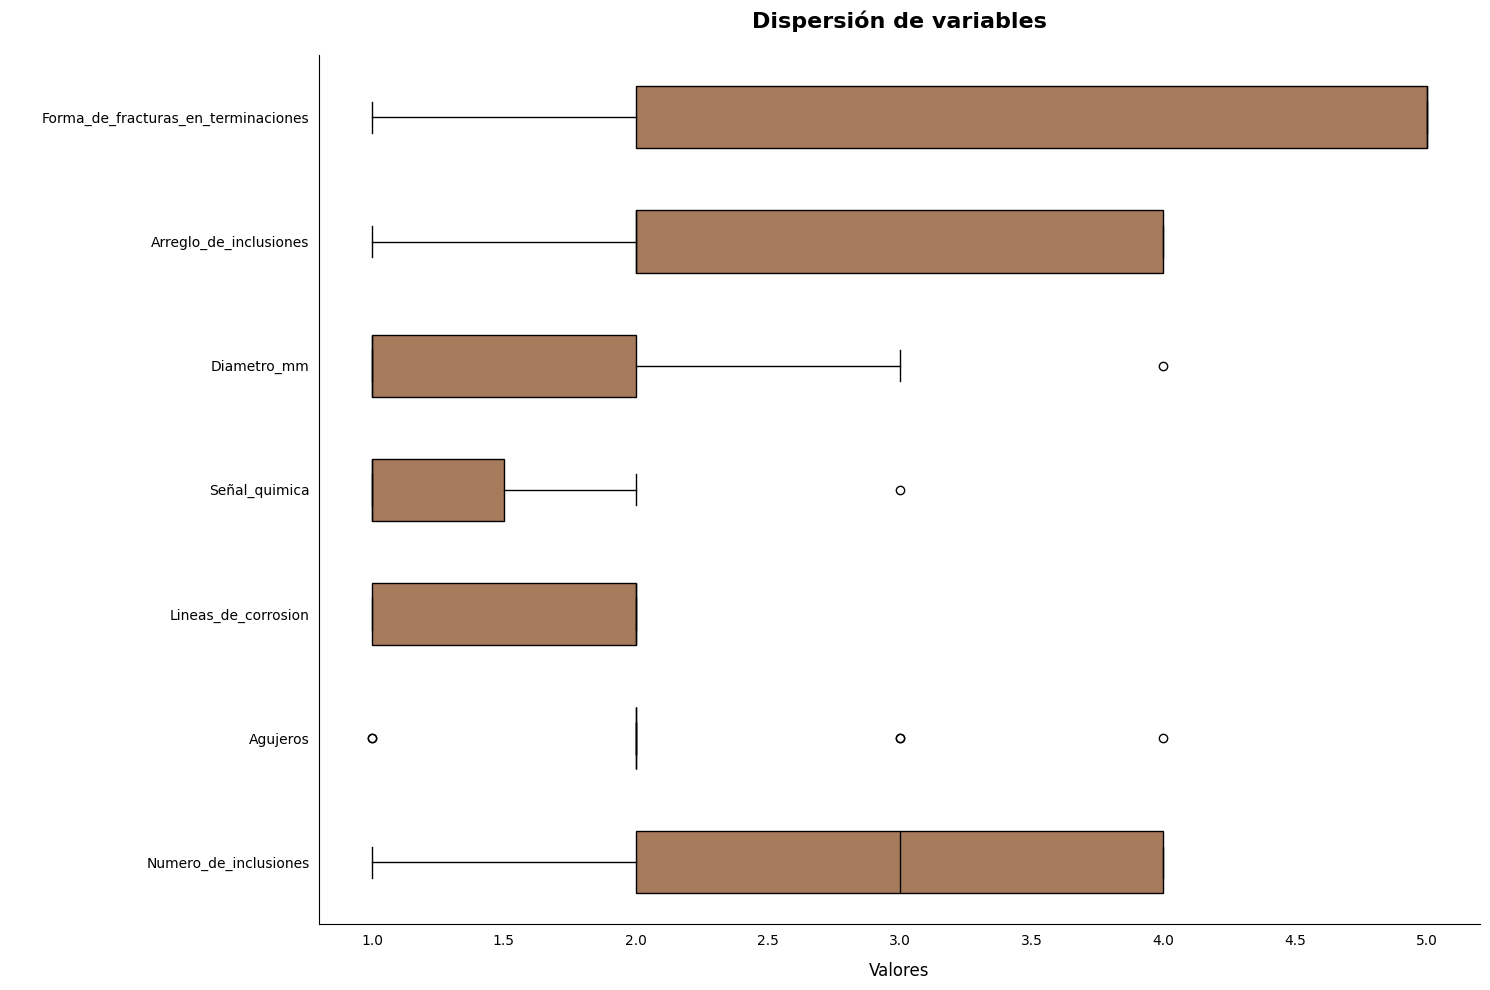

In [3]:
# Create a single figure with multiple horizontal boxplots
variables = ['Numero_de_inclusiones', 'Agujeros', 'Lineas_de_corrosion',
             'Señal_quimica', 'Diametro_mm', 'Arreglo_de_inclusiones',
             'Forma_de_fracturas_en_terminaciones']

fig, ax = plt.subplots(figsize=(15, 10))

# Plot each variable as a horizontal boxplot
ax.boxplot([df[var] for var in variables], vert=False, patch_artist=True, 
           boxprops=dict(facecolor='#A67B5B', color='black'),
           medianprops=dict(color='black'))

# Customize the plot
ax.set_yticklabels(variables)
ax.set_title('Dispersión de variables', fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Valores', fontsize=12, labelpad=10)
ax.set_ylabel(' ', fontsize=12, labelpad=10)

# Desactivar las marcas en el eje x de la subgráfica inferior
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
# Desactivar las marcas en el eje y de la subgráfica inferior
ax.tick_params(axis='y', which='both', left=False)
# Mantener solo el borde izquierdo y inferior de la subgráfica inferior
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

**¿Cómo se distribuyen las variables de nuestro Dataset?**

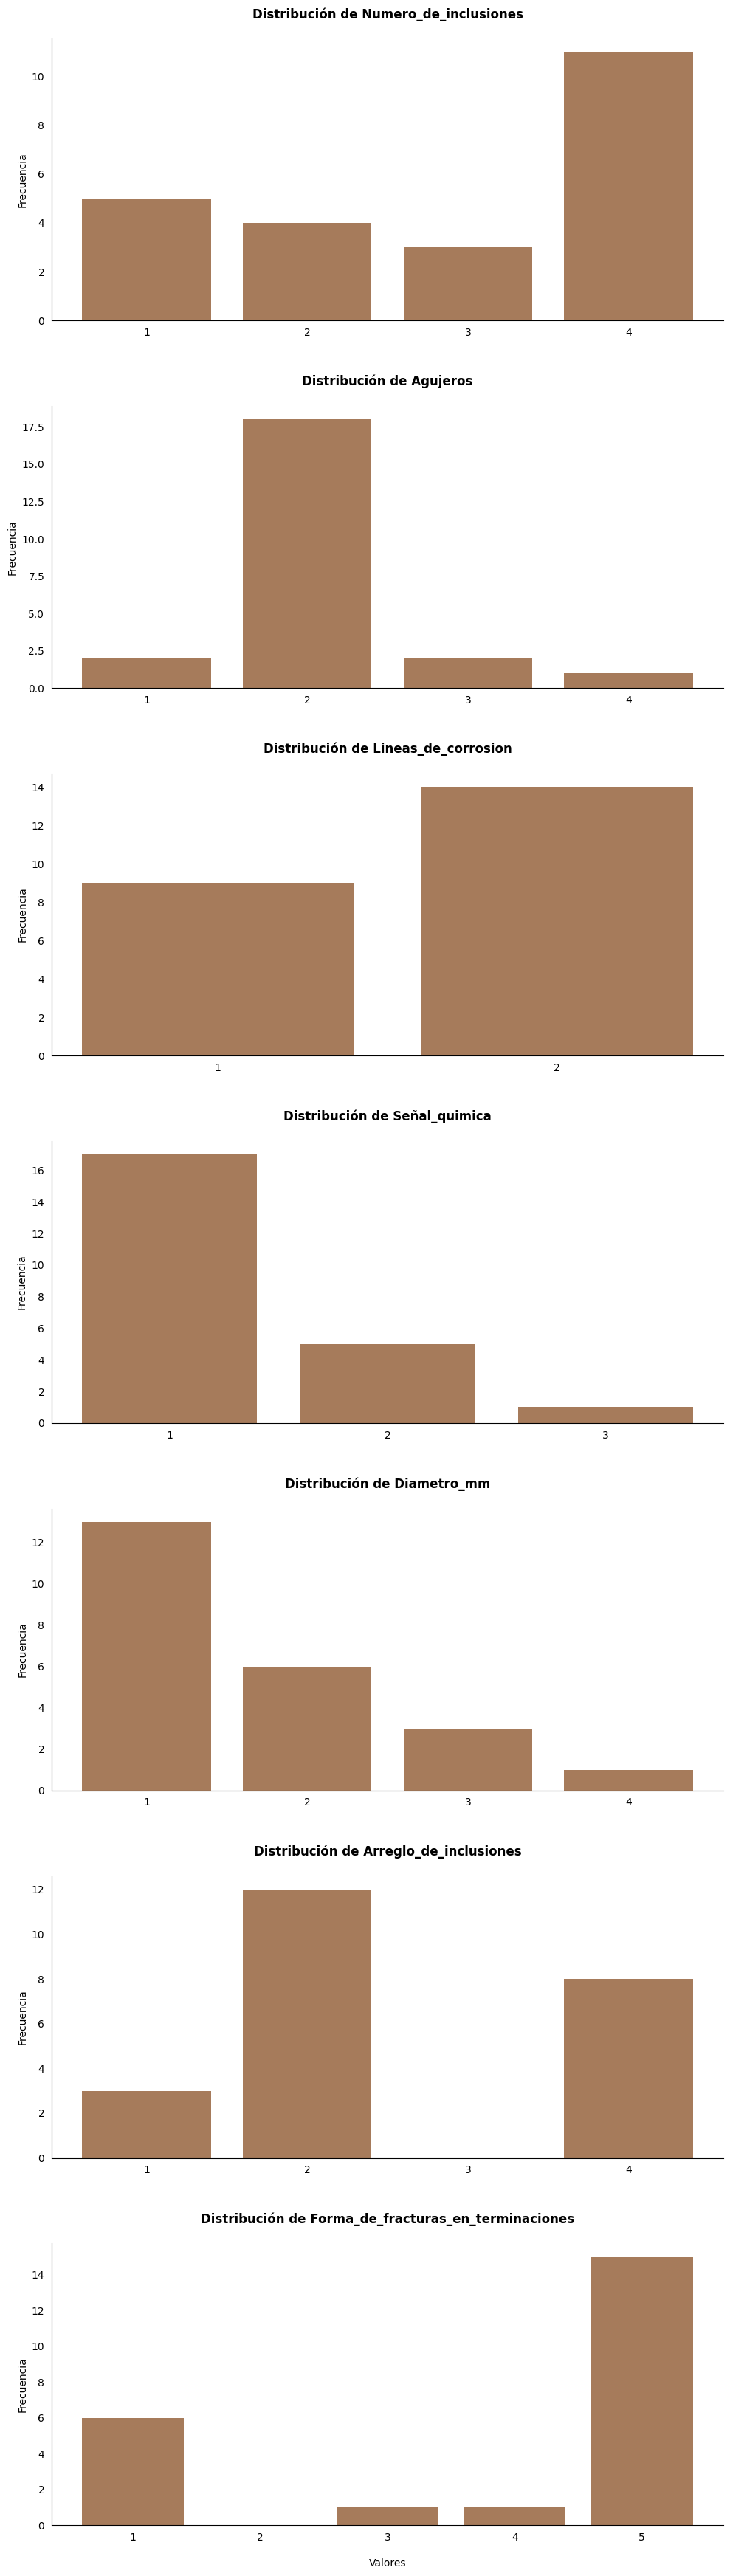

In [4]:
# Create subplots for each variable with bar plots showing the count of each value
variables = ['Numero_de_inclusiones', 'Agujeros', 'Lineas_de_corrosion',
             'Señal_quimica', 'Diametro_mm', 'Arreglo_de_inclusiones',
             'Forma_de_fracturas_en_terminaciones']

fig, axes = plt.subplots(len(variables), 1, figsize=(10, len(variables) * 5))

for i, variable in enumerate(variables):
    value_counts = df[variable].value_counts().sort_index()
    all_values = np.arange(int(df[variable].min()), int(df[variable].max()) + 1)
    counts = [value_counts.get(val, 0) for val in all_values]
    axes[i].bar(all_values.astype(str), counts, color='#A67B5B')
    axes[i].set_title(f"Distribución de {variable}", pad=20, fontweight='bold')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xlabel(' ', labelpad=15)

    # Customize ticks and spines
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    axes[i].tick_params(axis='y', which='both', left=False)
    axes[i].spines['left'].set_visible(True)
    axes[i].spines['bottom'].set_visible(True)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

axes[i].set_xlabel('Valores', labelpad=15)

# Customize the overall layout
plt.tight_layout()
plt.show()

**¿Qué valor de mediana muestran los datos para cada variable?**

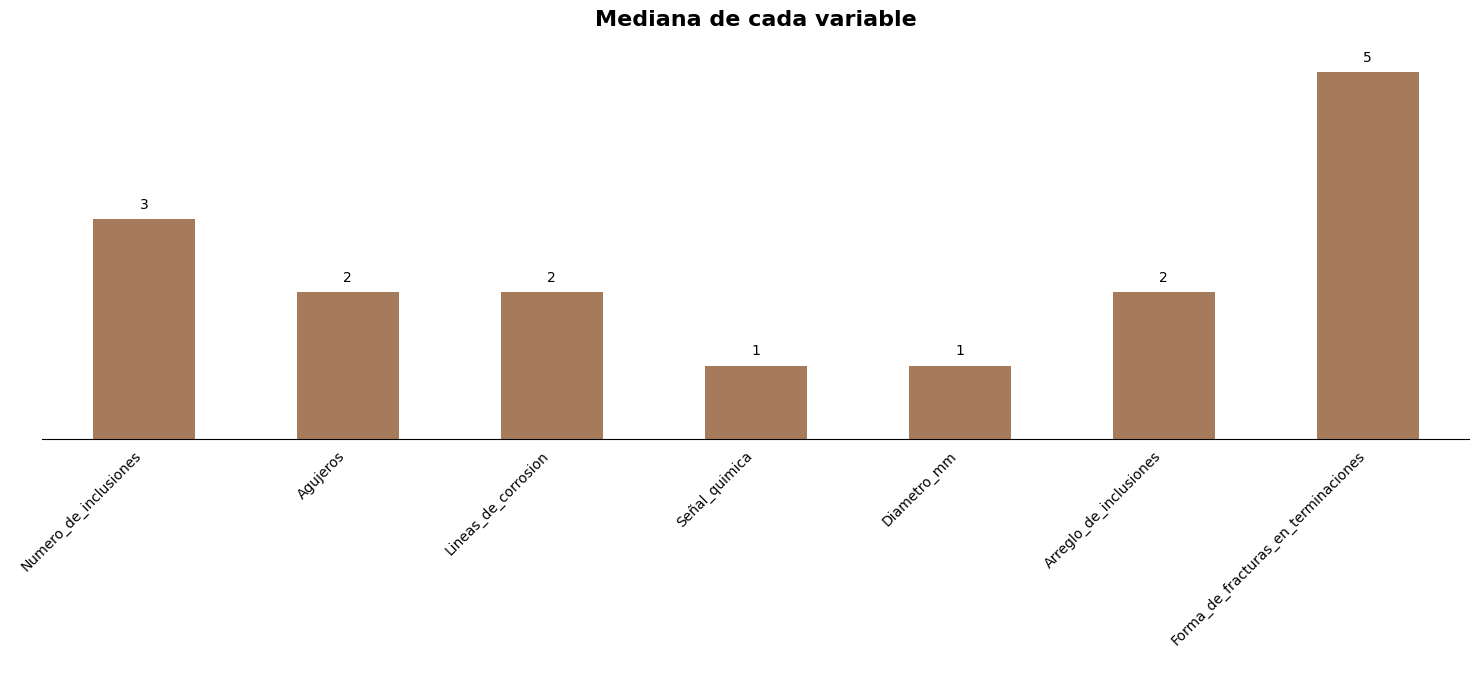

In [5]:
# Calculate the mean for each variable in the dataset
mean_values = df.median(numeric_only=True)

# Create a bar plot for the mean values of each variable
fig, ax = plt.subplots(figsize=(15, 7))
bars = mean_values.plot(kind='bar', color='#A67B5B', ax=ax)

# Customize the plot
ax.set_title('Mediana de cada variable', fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel(' ', fontsize=12, labelpad=10)
ax.set_ylabel(' ', fontsize=12, labelpad=10)
ax.set_xticklabels(mean_values.index, rotation=45, ha='right')

# Add text labels on bars
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{int(height)}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Customize ticks and spines
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

**¿Cómo se correlacionan las variables?**

<Axes: >

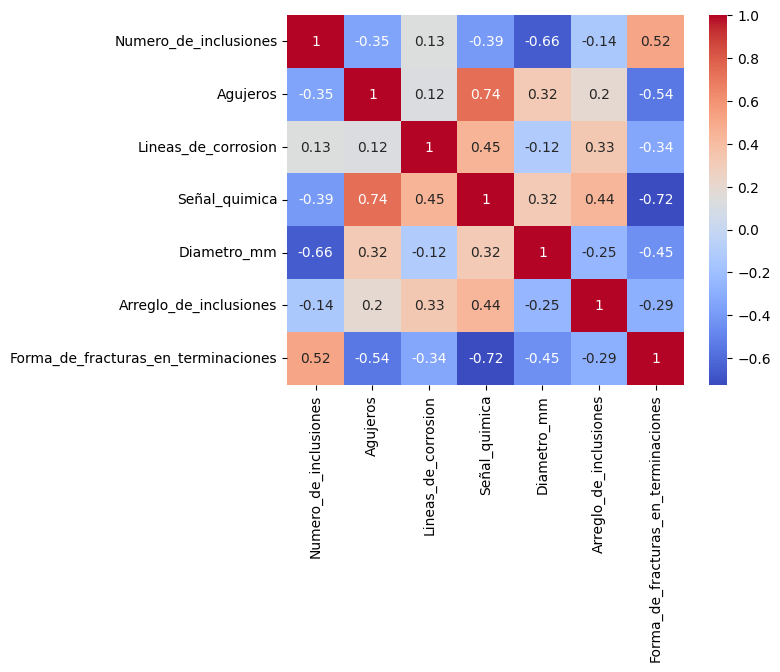

In [6]:
# Vemos si hay correlación entre las variables con un heatmap
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap='coolwarm')

Se observan correlación con ciertos variables de los coprolitos, esto por  las alteraciones de las inclusiones generadas de las distintas estrategias digestivas de los organismos productores. La señal química y los pitting (Agujeros) son los que comparten mayor correlación, y esto se explica por la acción enzimática ejercida sobre los alimentos en el tracto digestivo, ya que entre mayor sea la señal química detectada en los coprolitos más pitting tendrá como resultado de la actividad bacteriana y liberación de gases digestivos. Las líneas de corrosión también son resultado de la actividad enzimática digestiva, por lo que se detecta una correlación de esta variable con la de señal química. Por otro lado, la forma de las terminaciones de los coprolitos y el arreglo de las inclusiones sobre estos parecen tener una correlación, aunque débil, posiblemente se deba a la forma de excreción del organismo que lo produjo y como influyó en el acomodo espacial de los residuos de alimento en la excreta

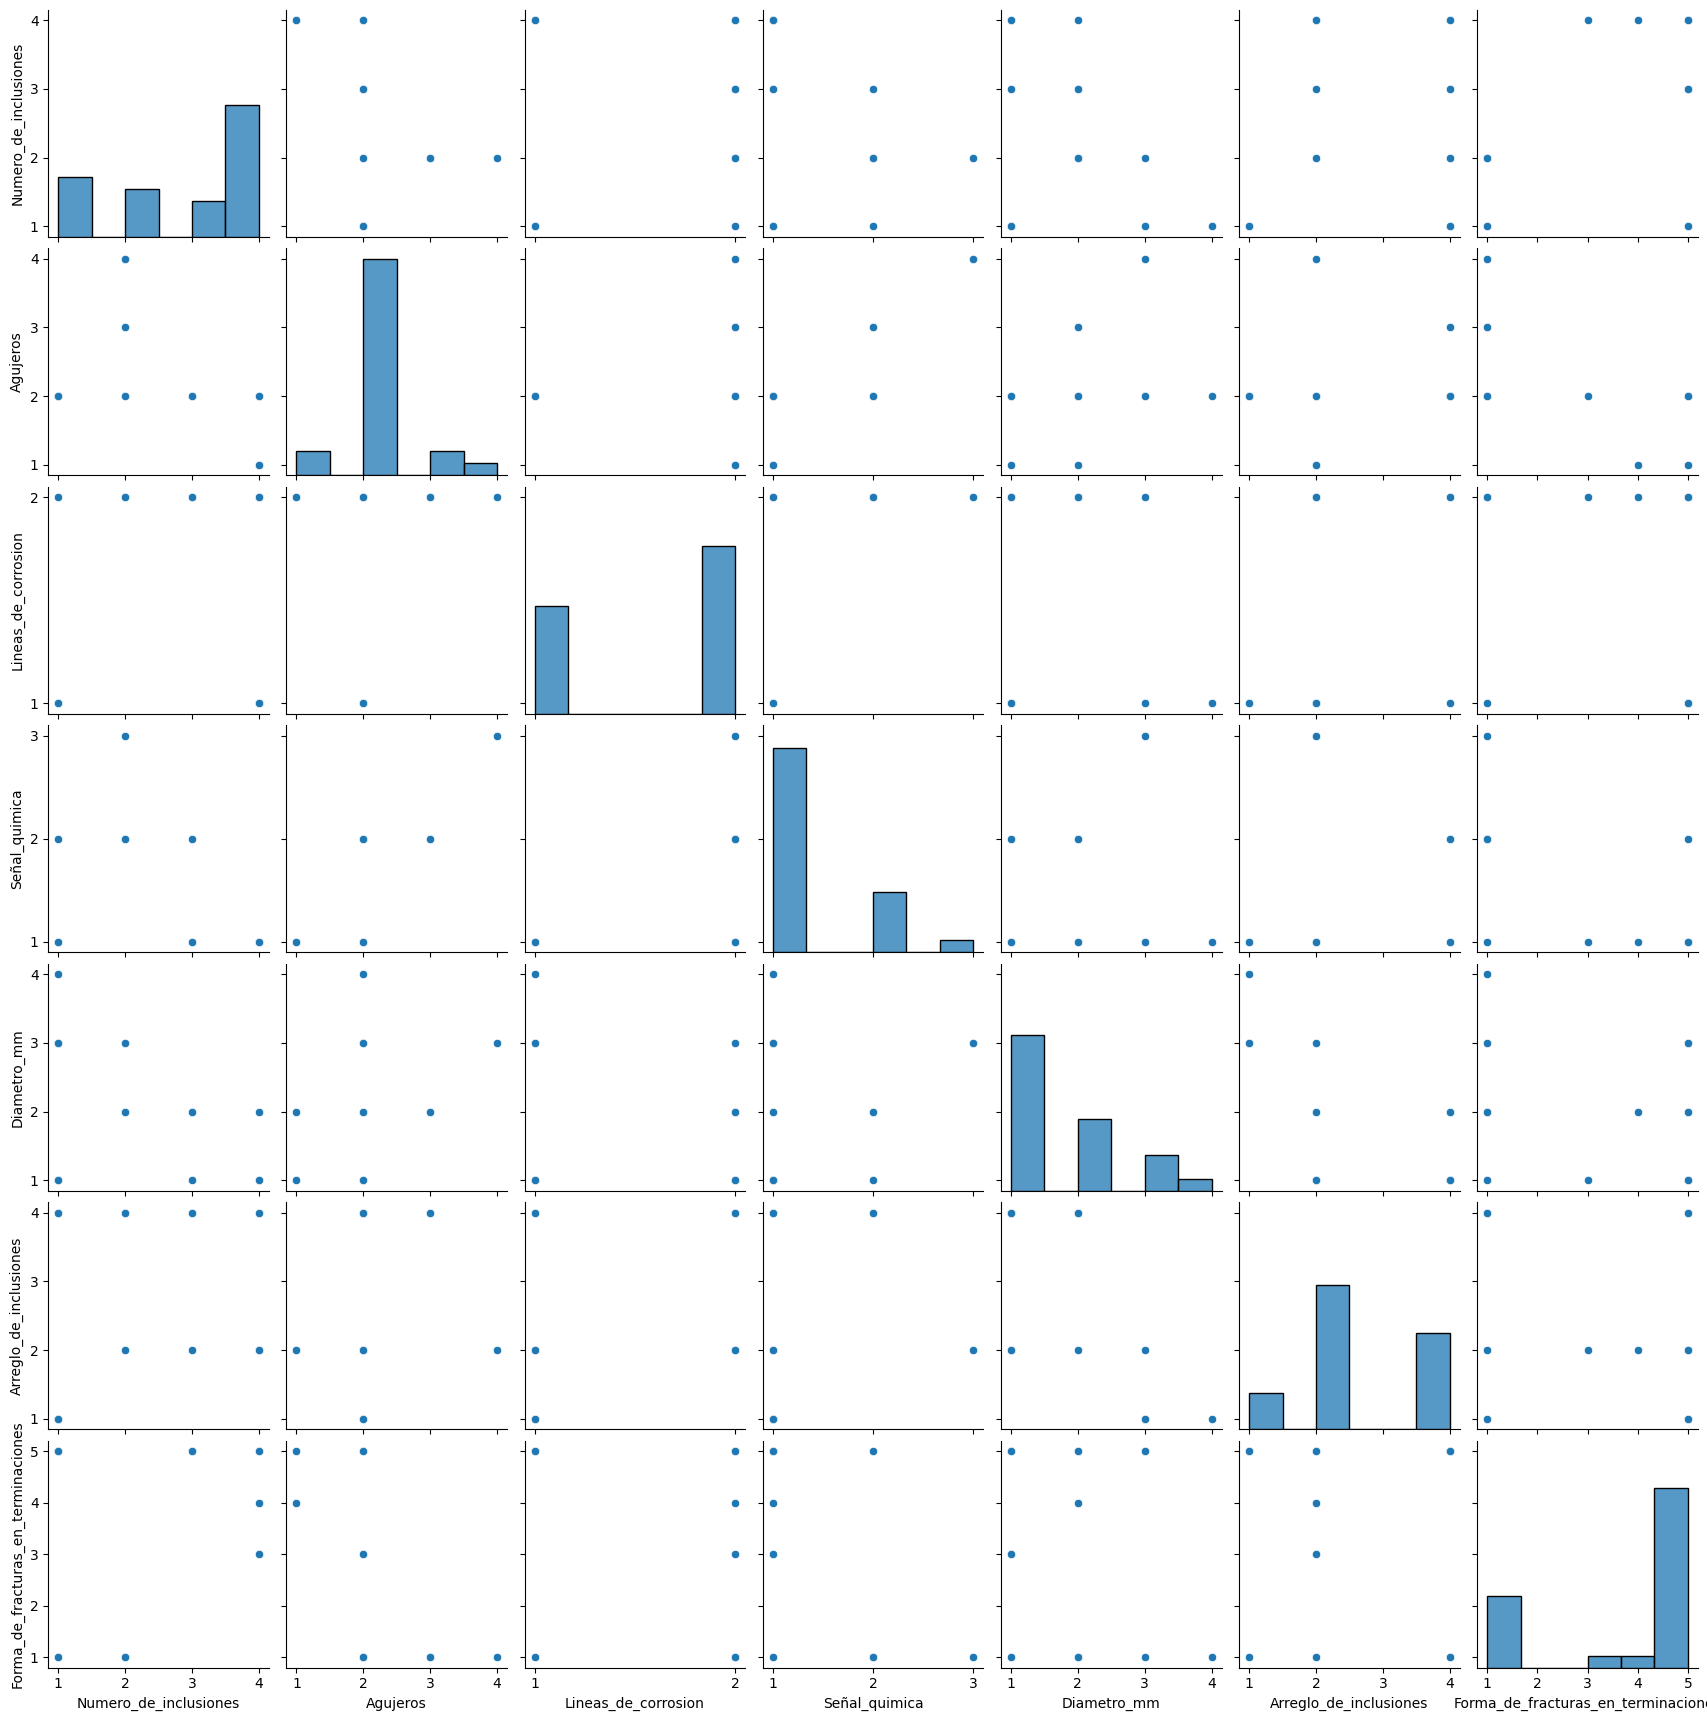

In [7]:
# Generate a pair plot of the dataset
g = sns.pairplot(df)

# Customize the plot to show integer values on axes
for ax in g.axes.flatten():
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

**¿Qué Ejemplares y con qué frecuencia están presentes en nuestro Dataset?**

C:\Users\jcbar\AppData\Local\Temp\ipykernel_33800\845465391.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ejemplar_counts.index, rotation=45, ha='right')


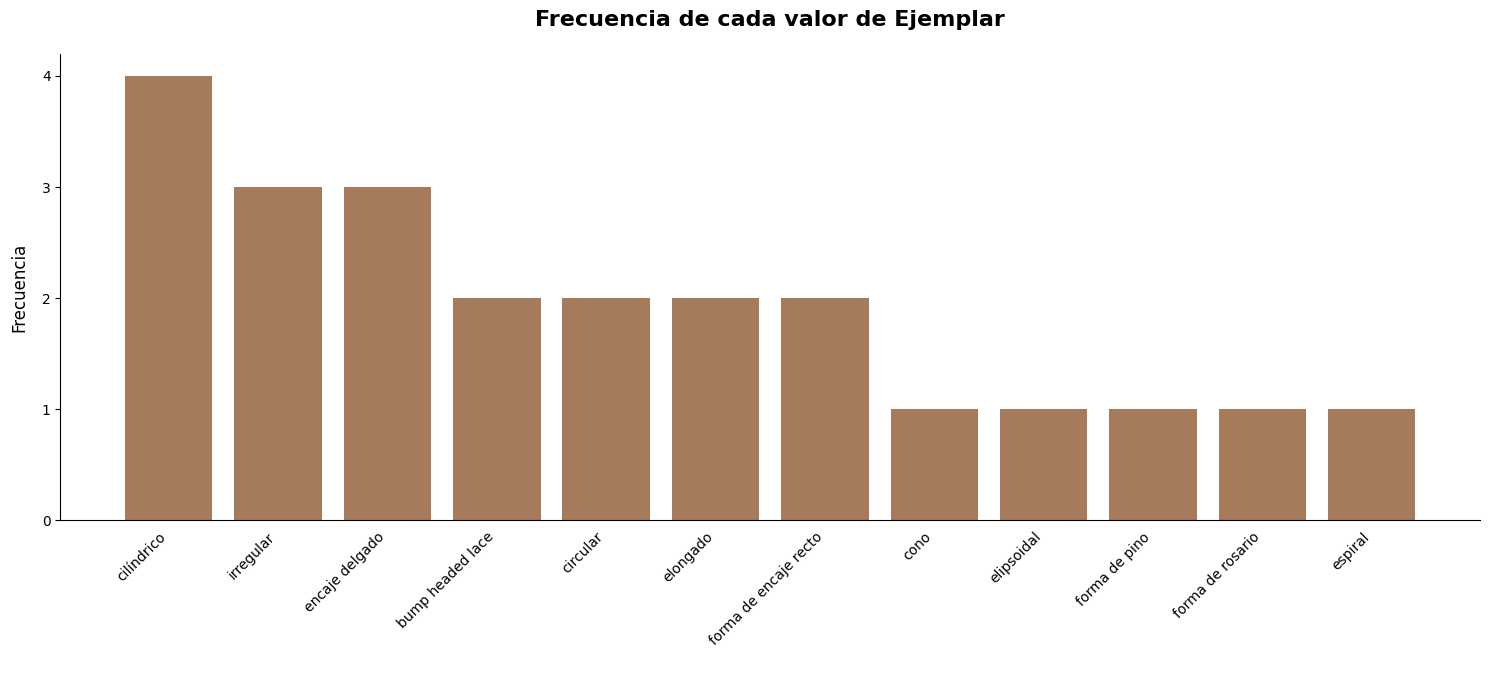

In [8]:
# Create a bar plot showing the frequency of each value in 'Ejemplar' sorted by frequency
ejemplar_counts = df['Ejemplar'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(ejemplar_counts.index, ejemplar_counts, color='#A67B5B')

# Customize the plot
ax.set_title('Frecuencia de cada valor de Ejemplar', fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel(' ', fontsize=12, labelpad=10)
ax.set_ylabel('Frecuencia', fontsize=12, labelpad=10)
ax.set_xticklabels(ejemplar_counts.index, rotation=45, ha='right')

# Customize ticks and spines
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure y-axis only shows integer values
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

**¿Cómo es la dispersión de los datos de cada ejemplar?**

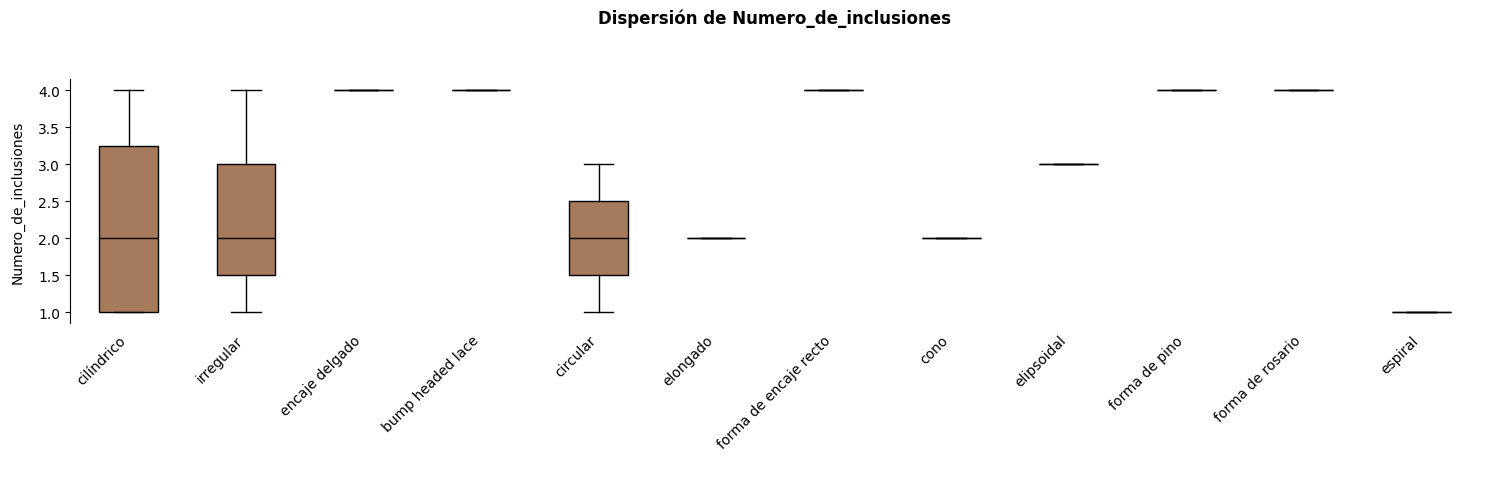

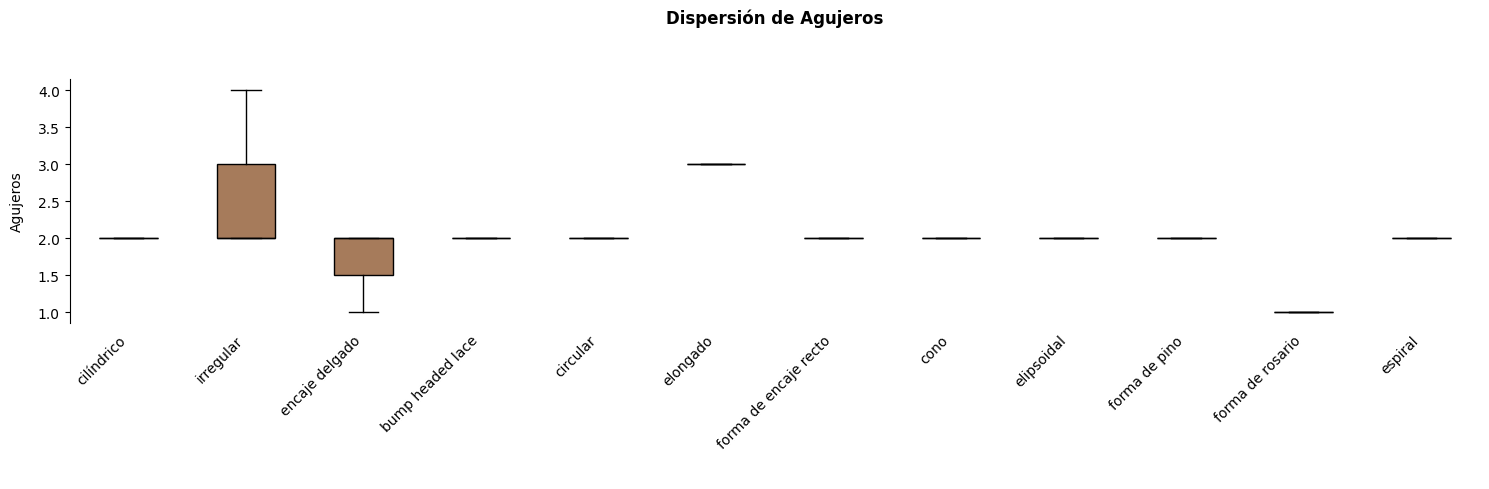

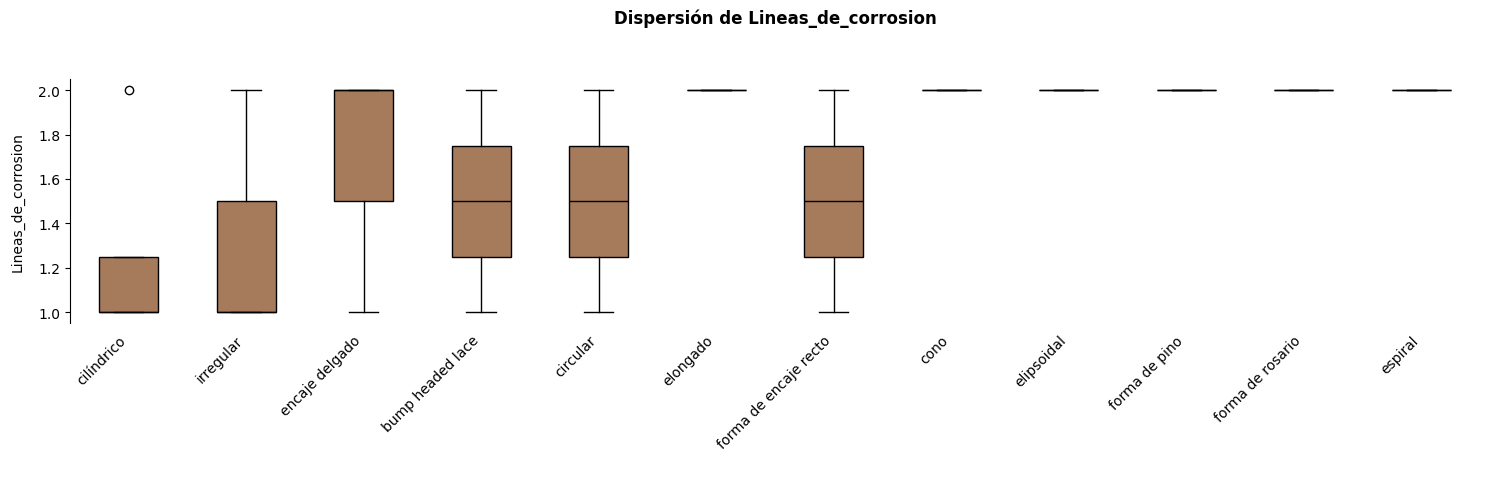

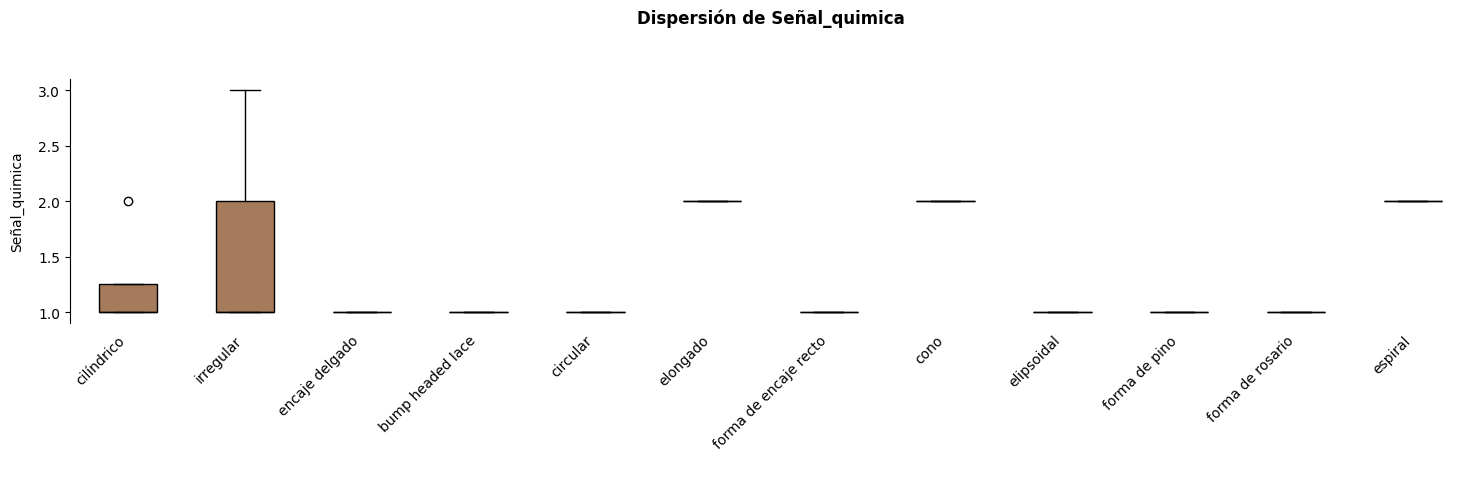

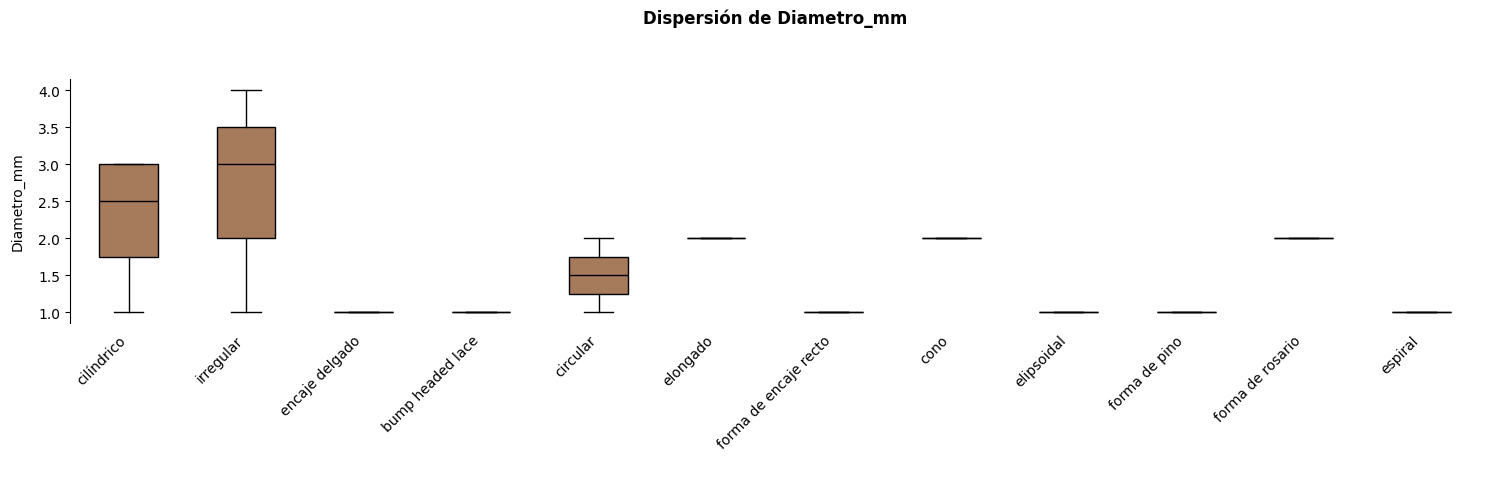

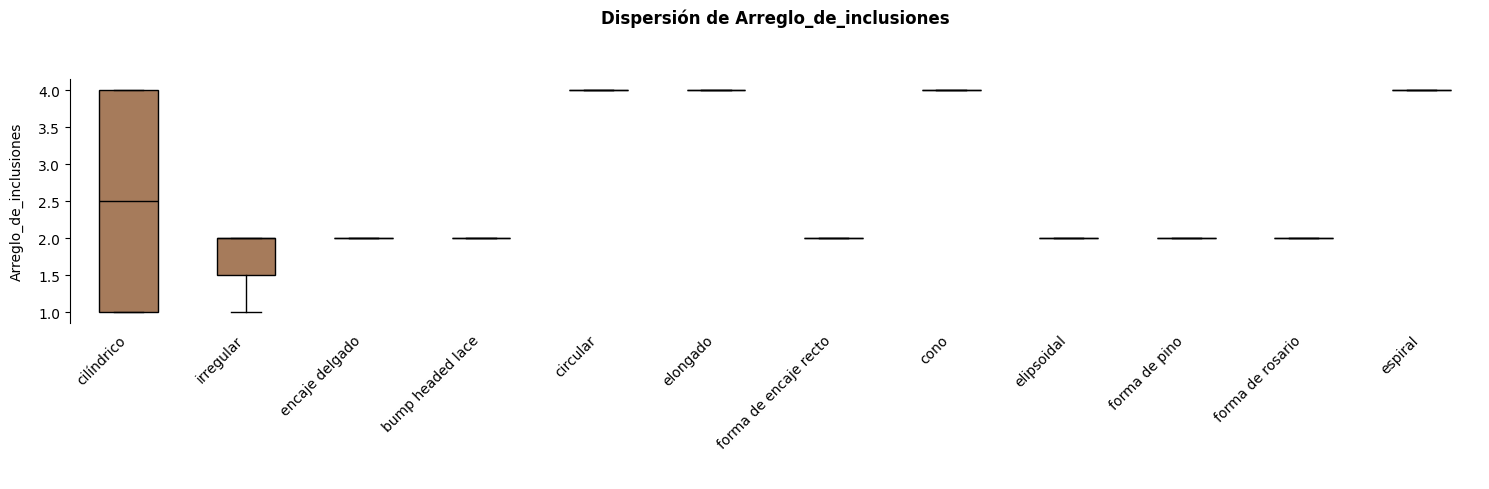

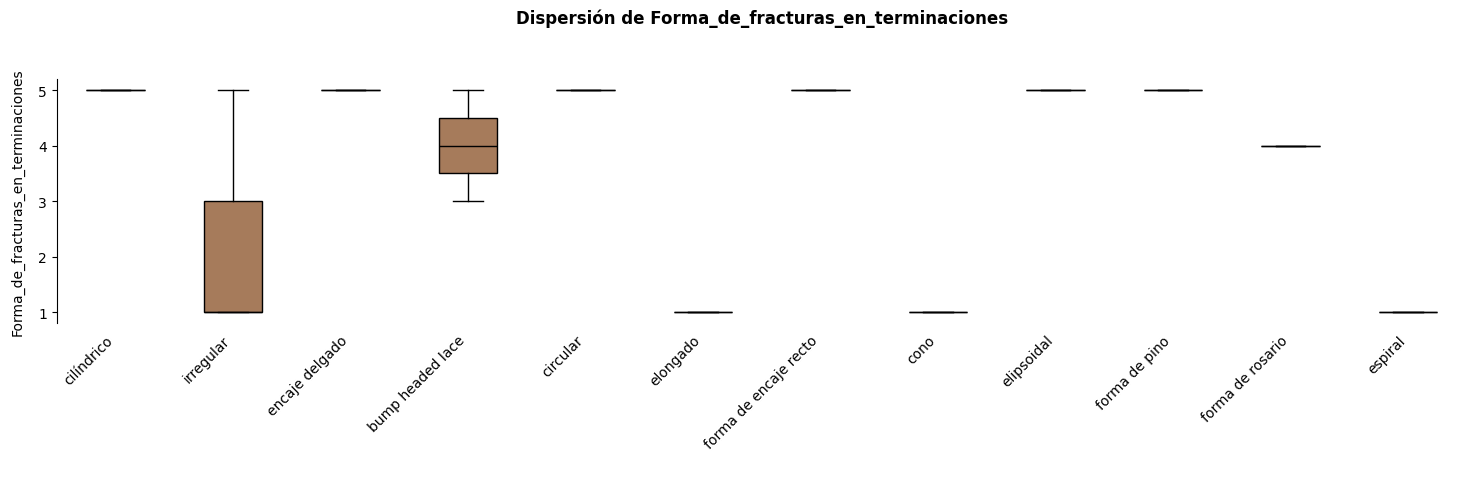

In [11]:
# Create individual figures for each variable as a boxplot for each Ejemplar in the specified order
ejemplar_order = df['Ejemplar'].value_counts().sort_values(ascending=False).index

# Group by 'Ejemplar' and calculate the median for each group
grouped_data = df.groupby('Ejemplar').median()

for i, column in enumerate(grouped_data.columns):
    fig, ax = plt.subplots(figsize=(15, 5))
    data_to_plot = [df[df['Ejemplar'] == ejemplar][column] for ejemplar in ejemplar_order]
    ax.boxplot(data_to_plot, vert=True, patch_artist=True, 
               boxprops=dict(facecolor='#A67B5B', color='black'),
               medianprops=dict(color='black'))
    ax.set_xticks(range(1, len(ejemplar_order) + 1))
    ax.set_xticklabels(ejemplar_order, rotation=45, ha='right')
    ax.set_title(f"Dispersión de {column}", pad=40, fontweight='bold')
    ax.set_ylabel(column, labelpad=10)
    ax.set_xlabel(' ', labelpad=10)

    # Desactivar las marcas en el eje x de la subgráfica inferior
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    # Desactivar las marcas en el eje y de la subgráfica inferior
    ax.tick_params(axis='y', which='both', left=True)

    # Mantener solo el borde izquierdo y inferior de la subgráfica inferior
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

**¿Cómo se distribuyen las variables del Dataset en cada tipo de ejemplar?**

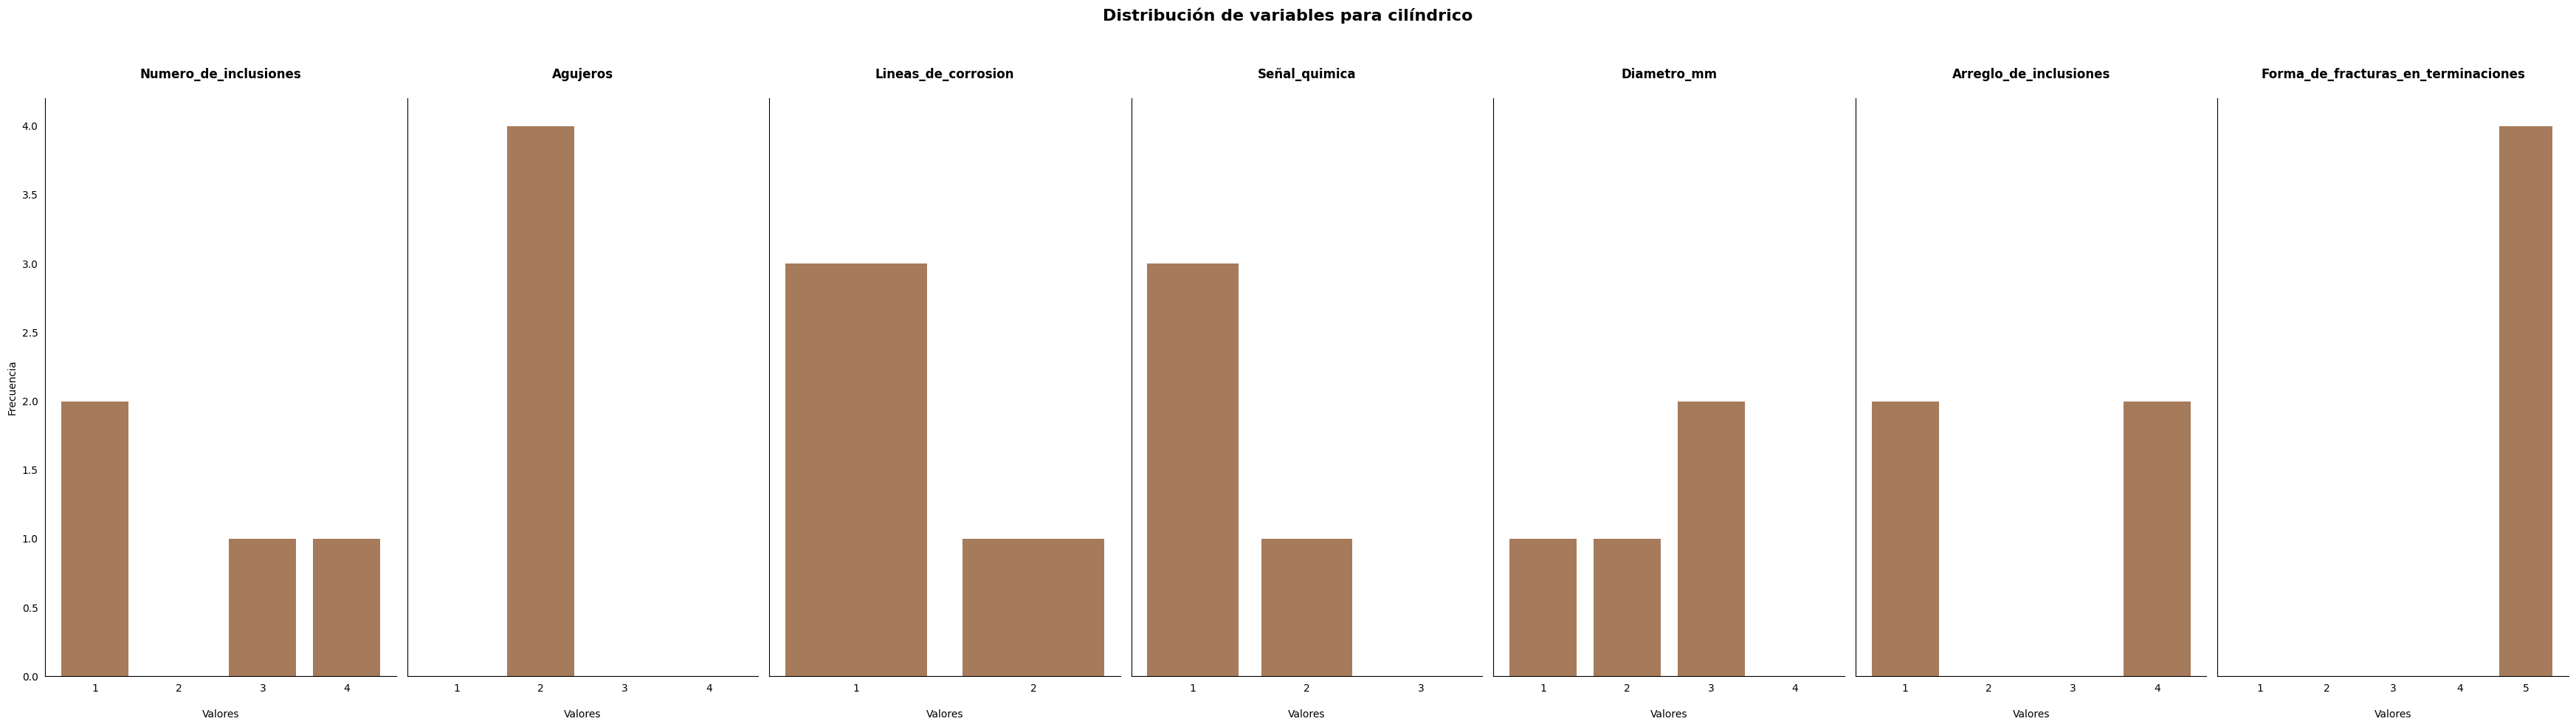

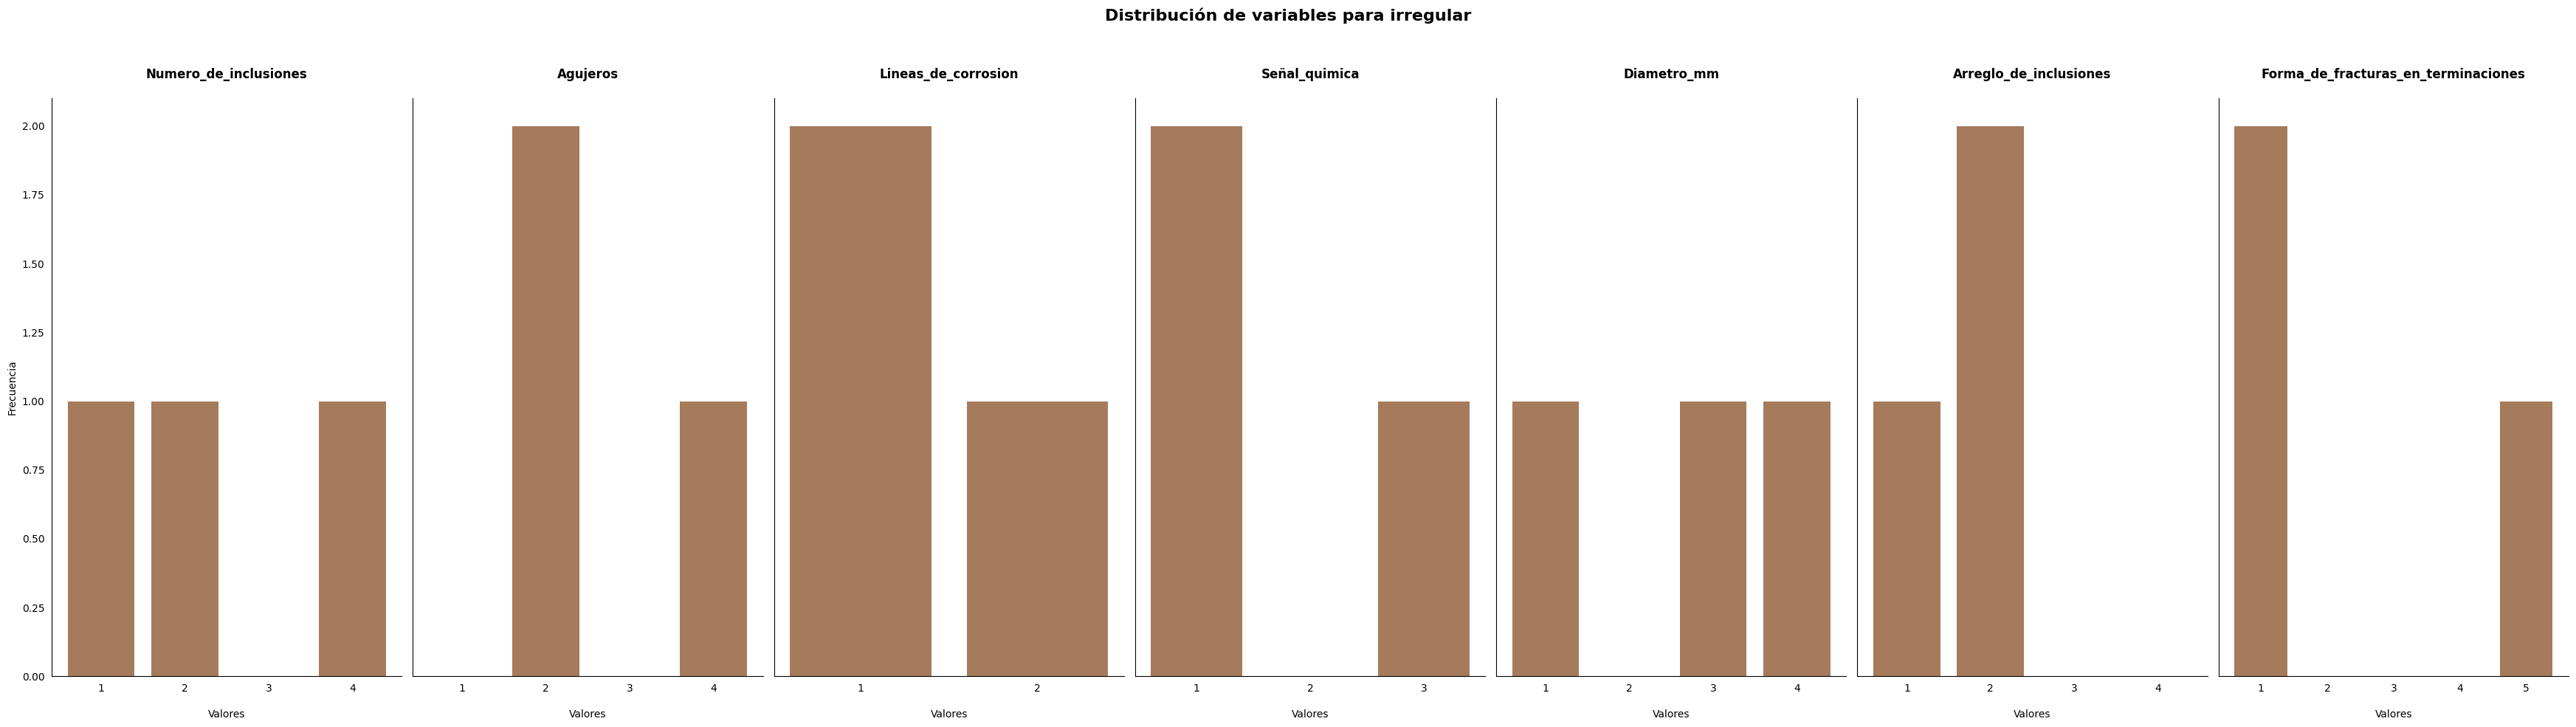

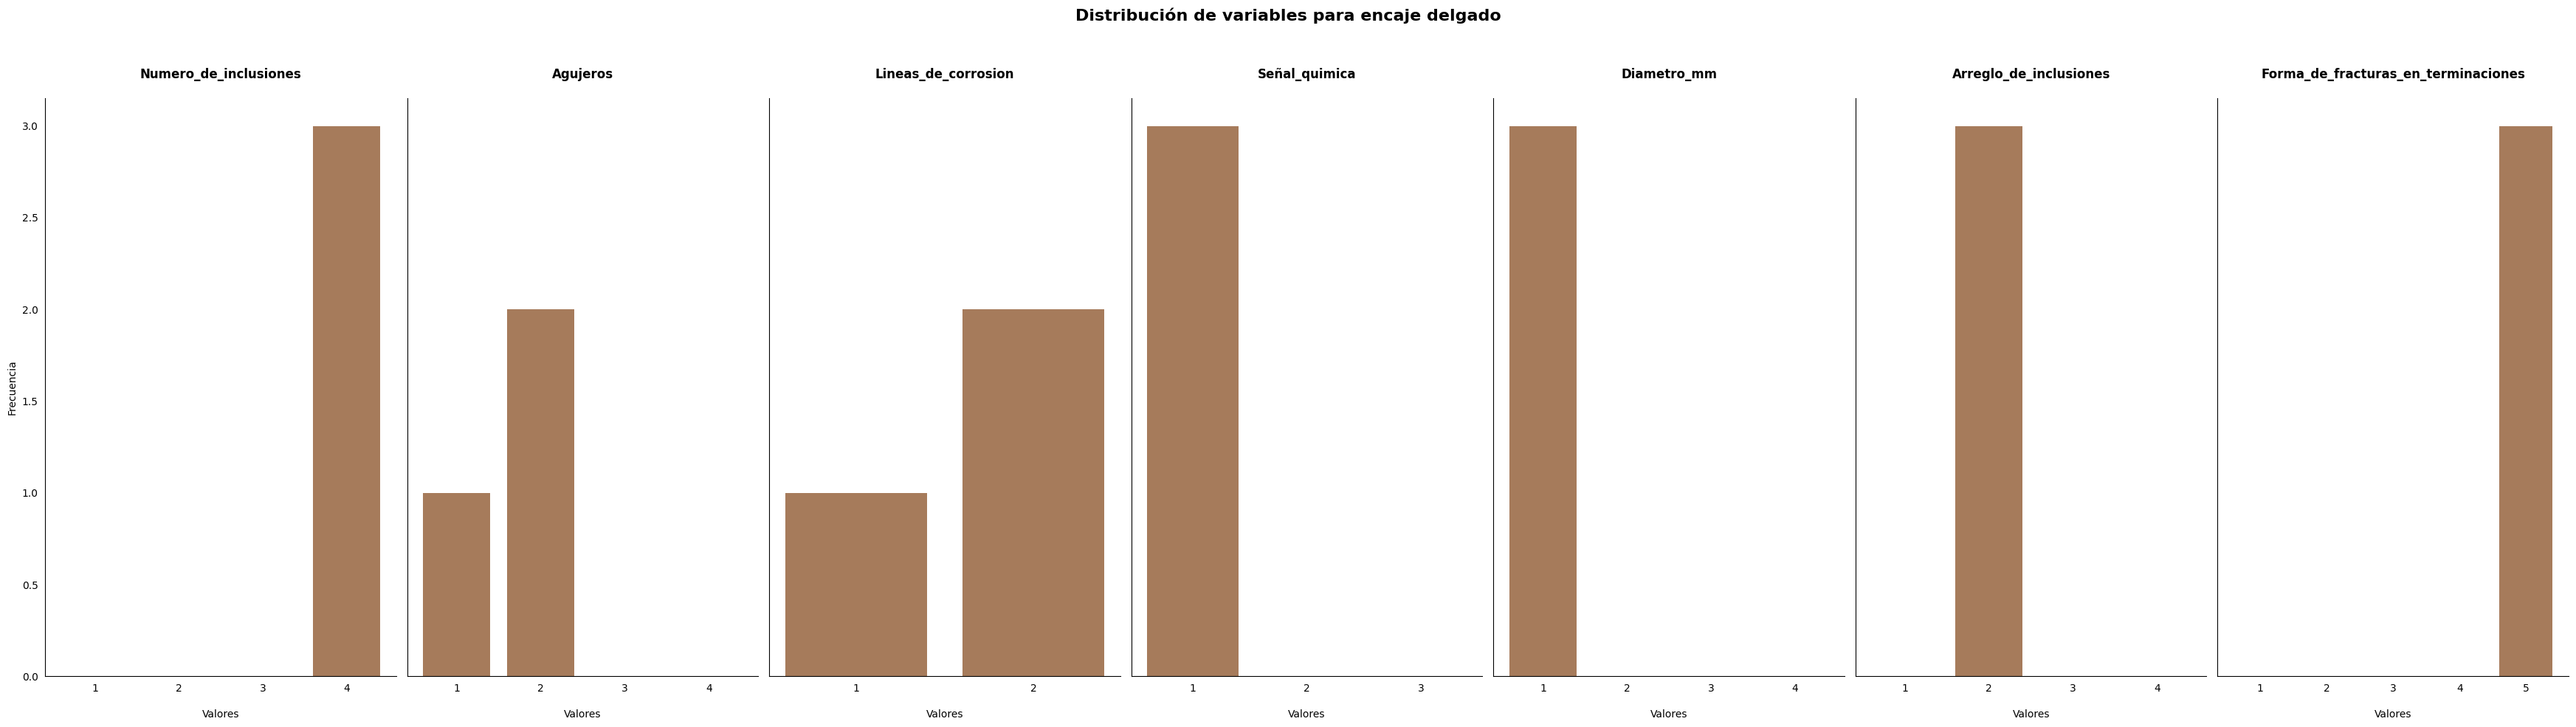

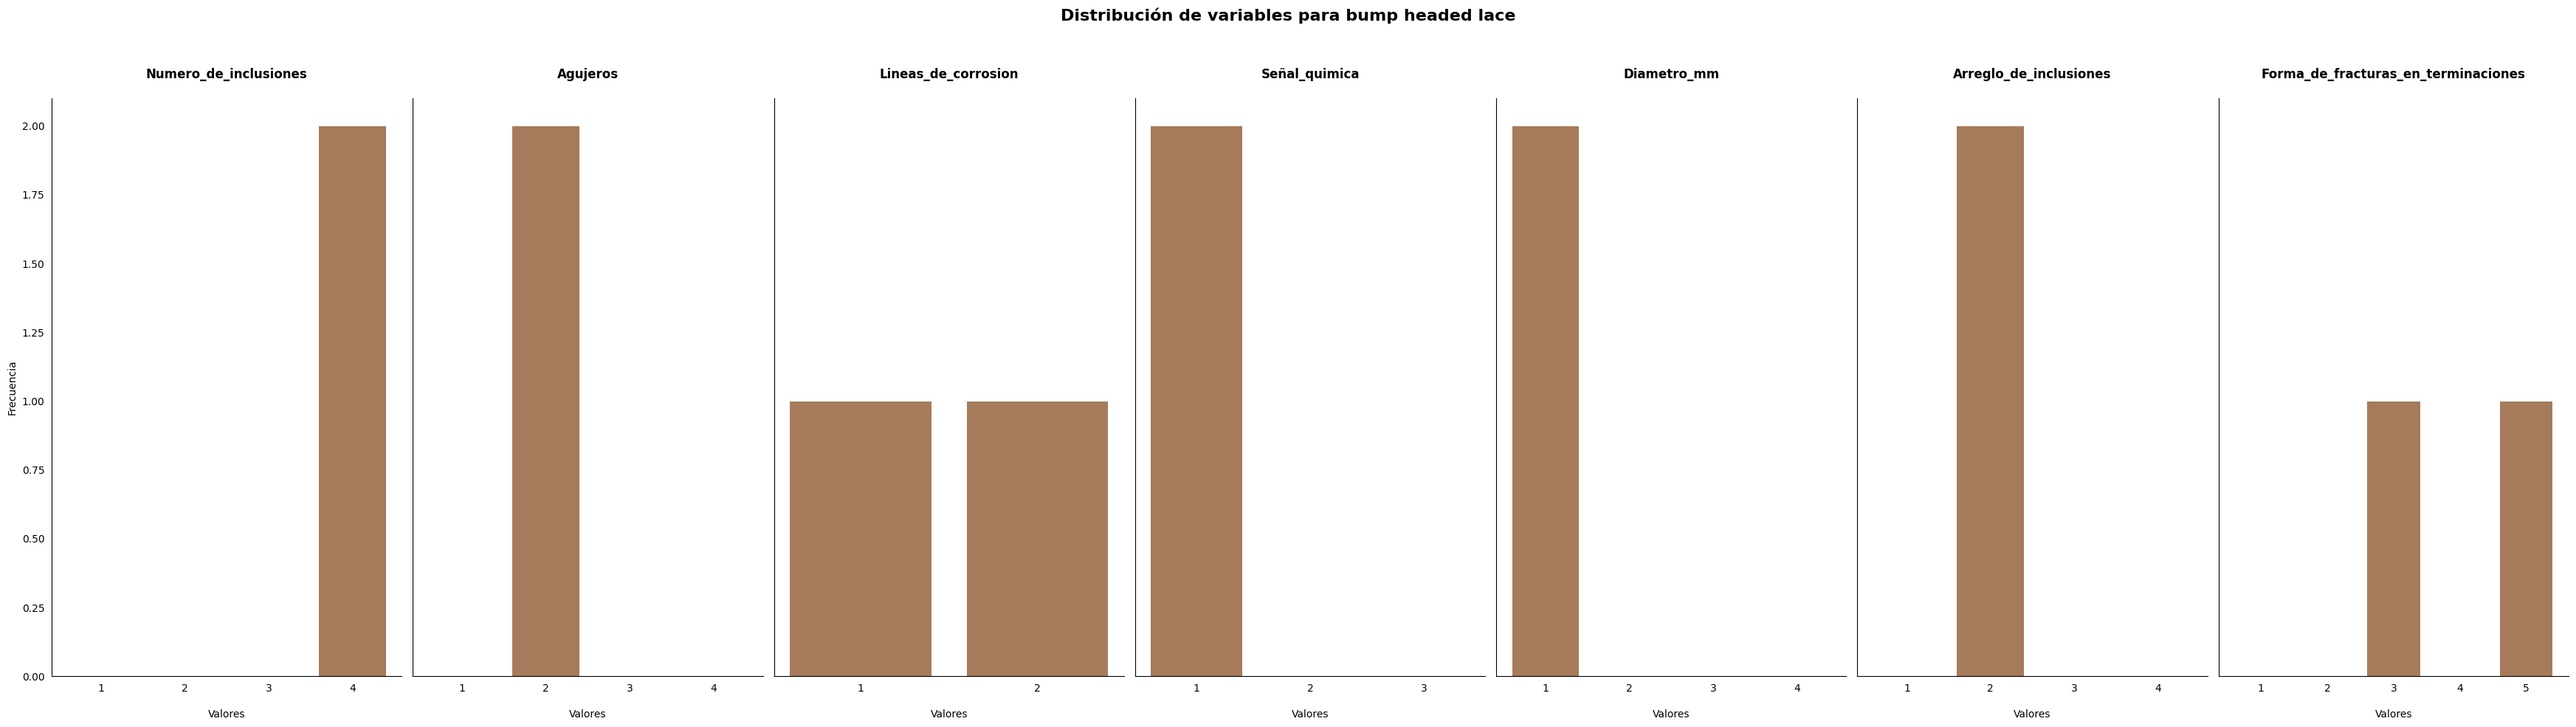

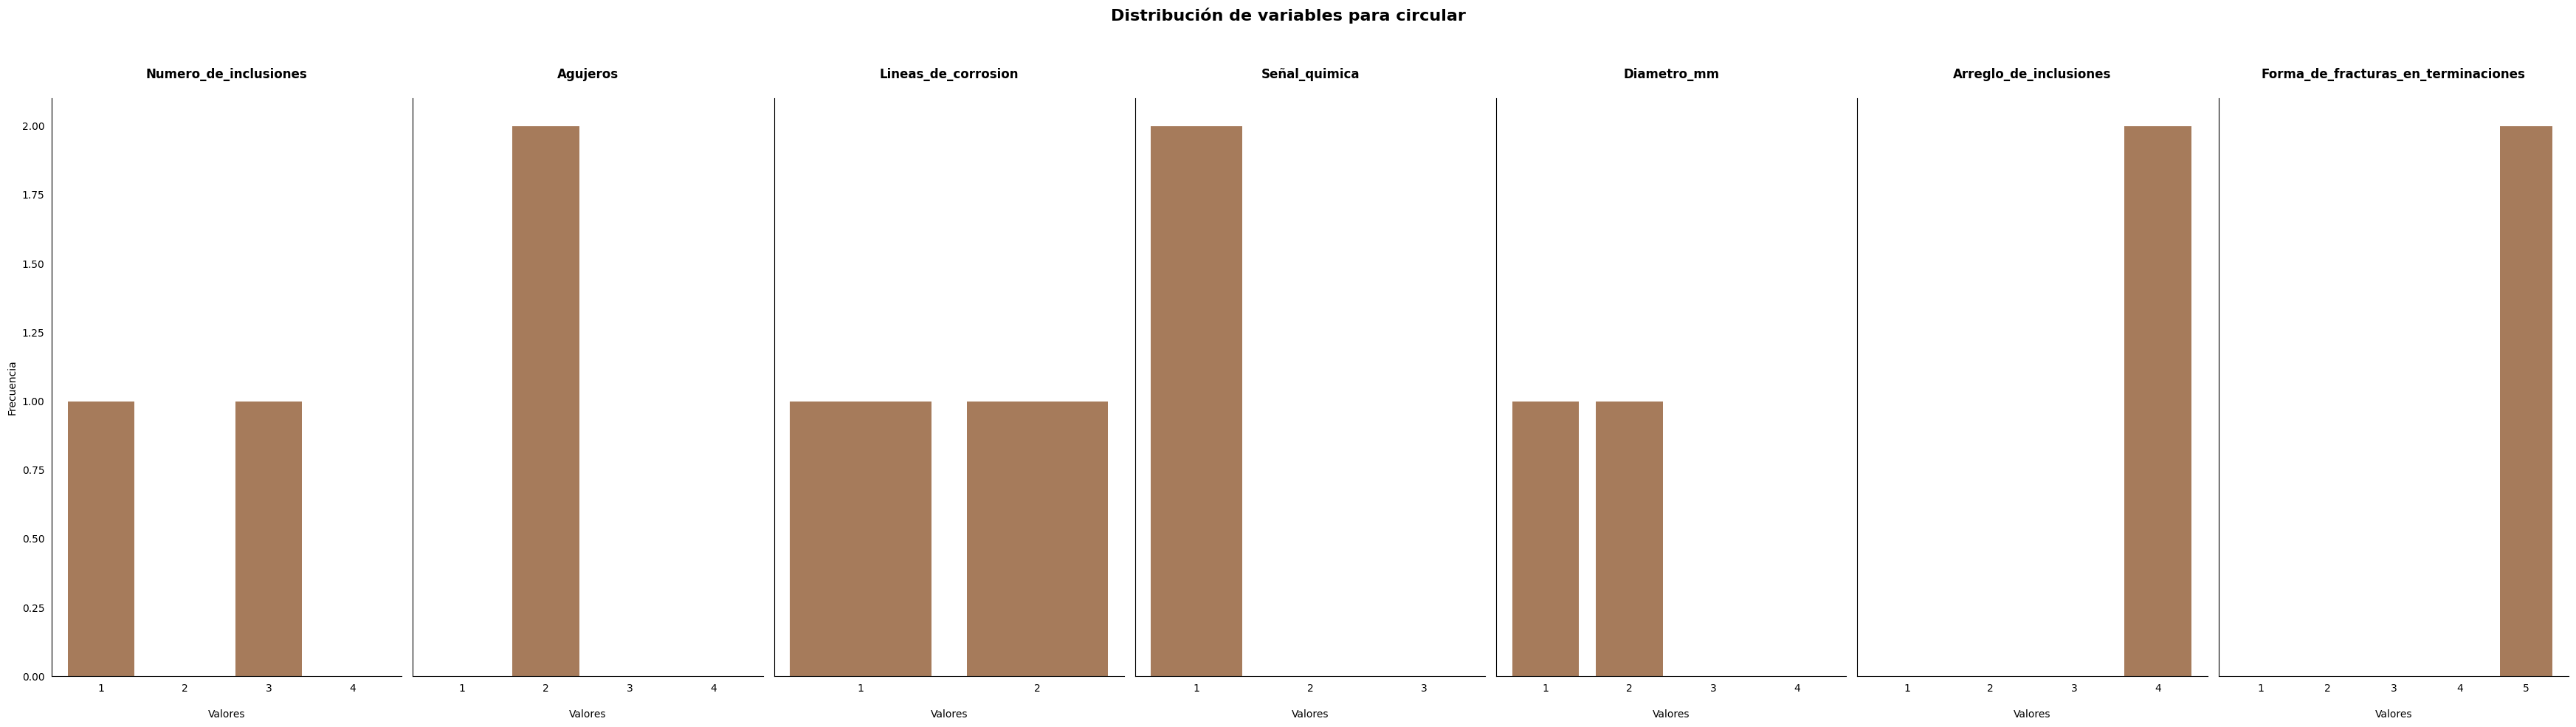

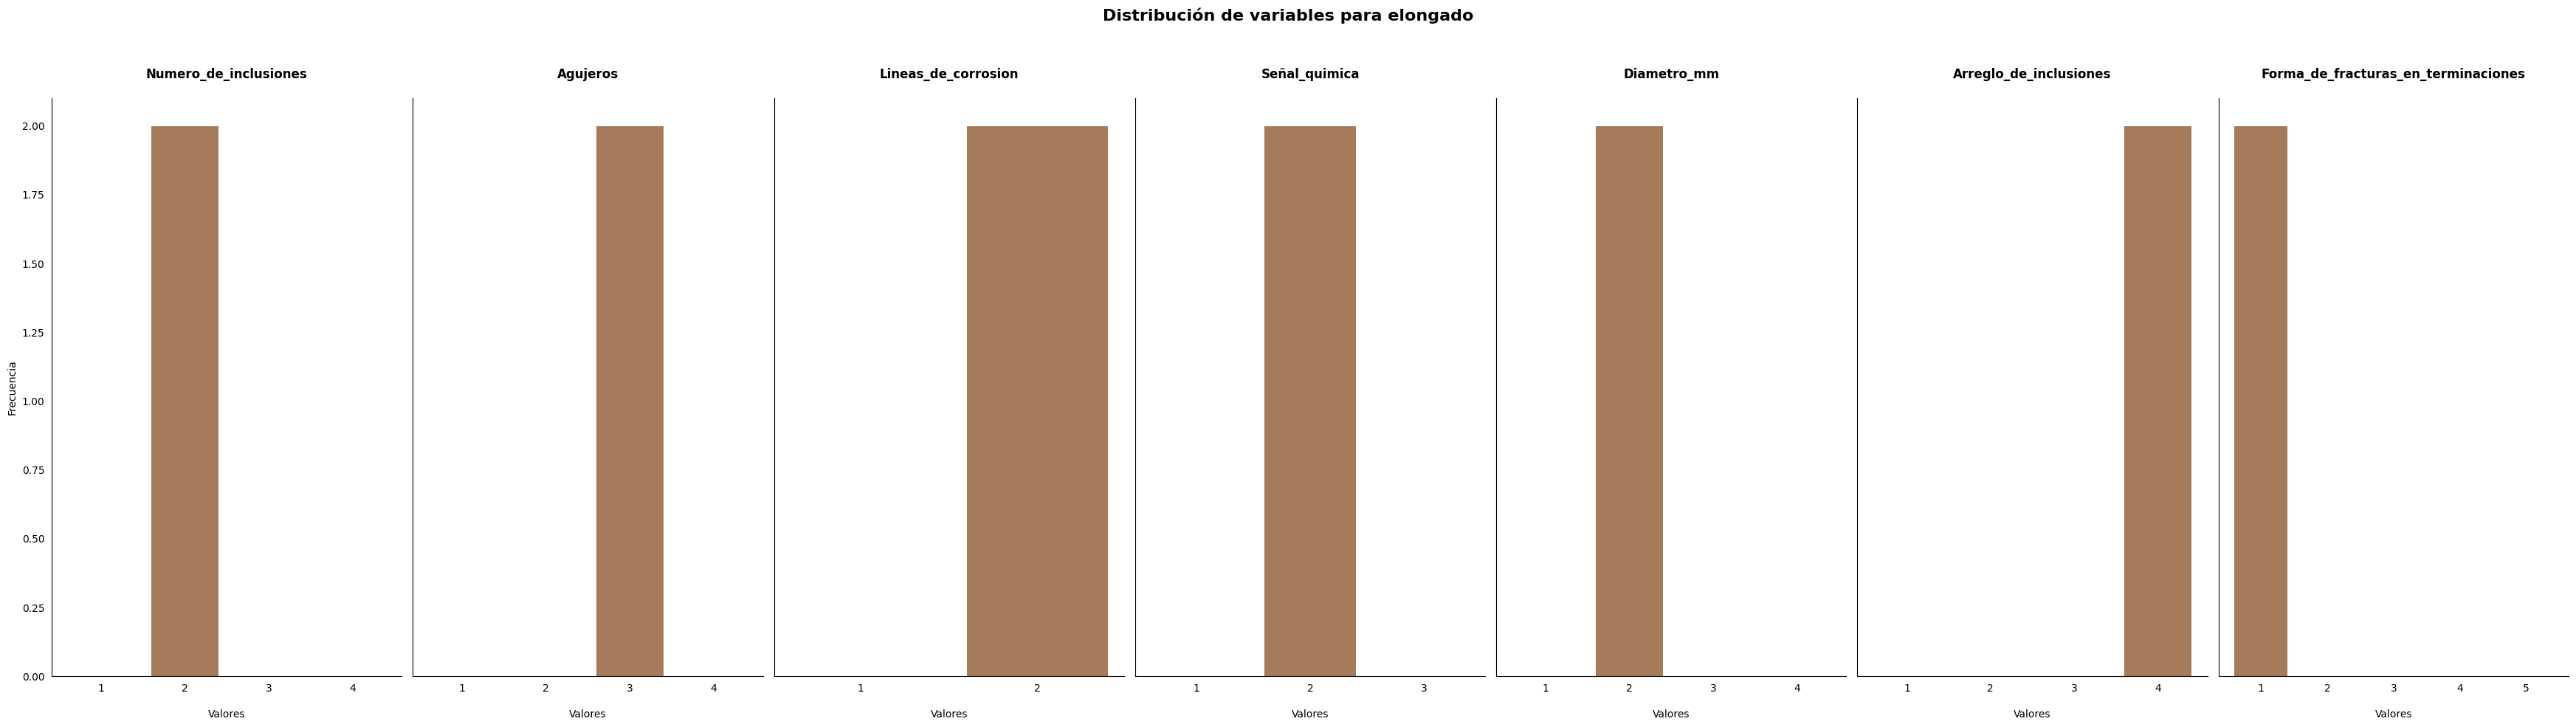

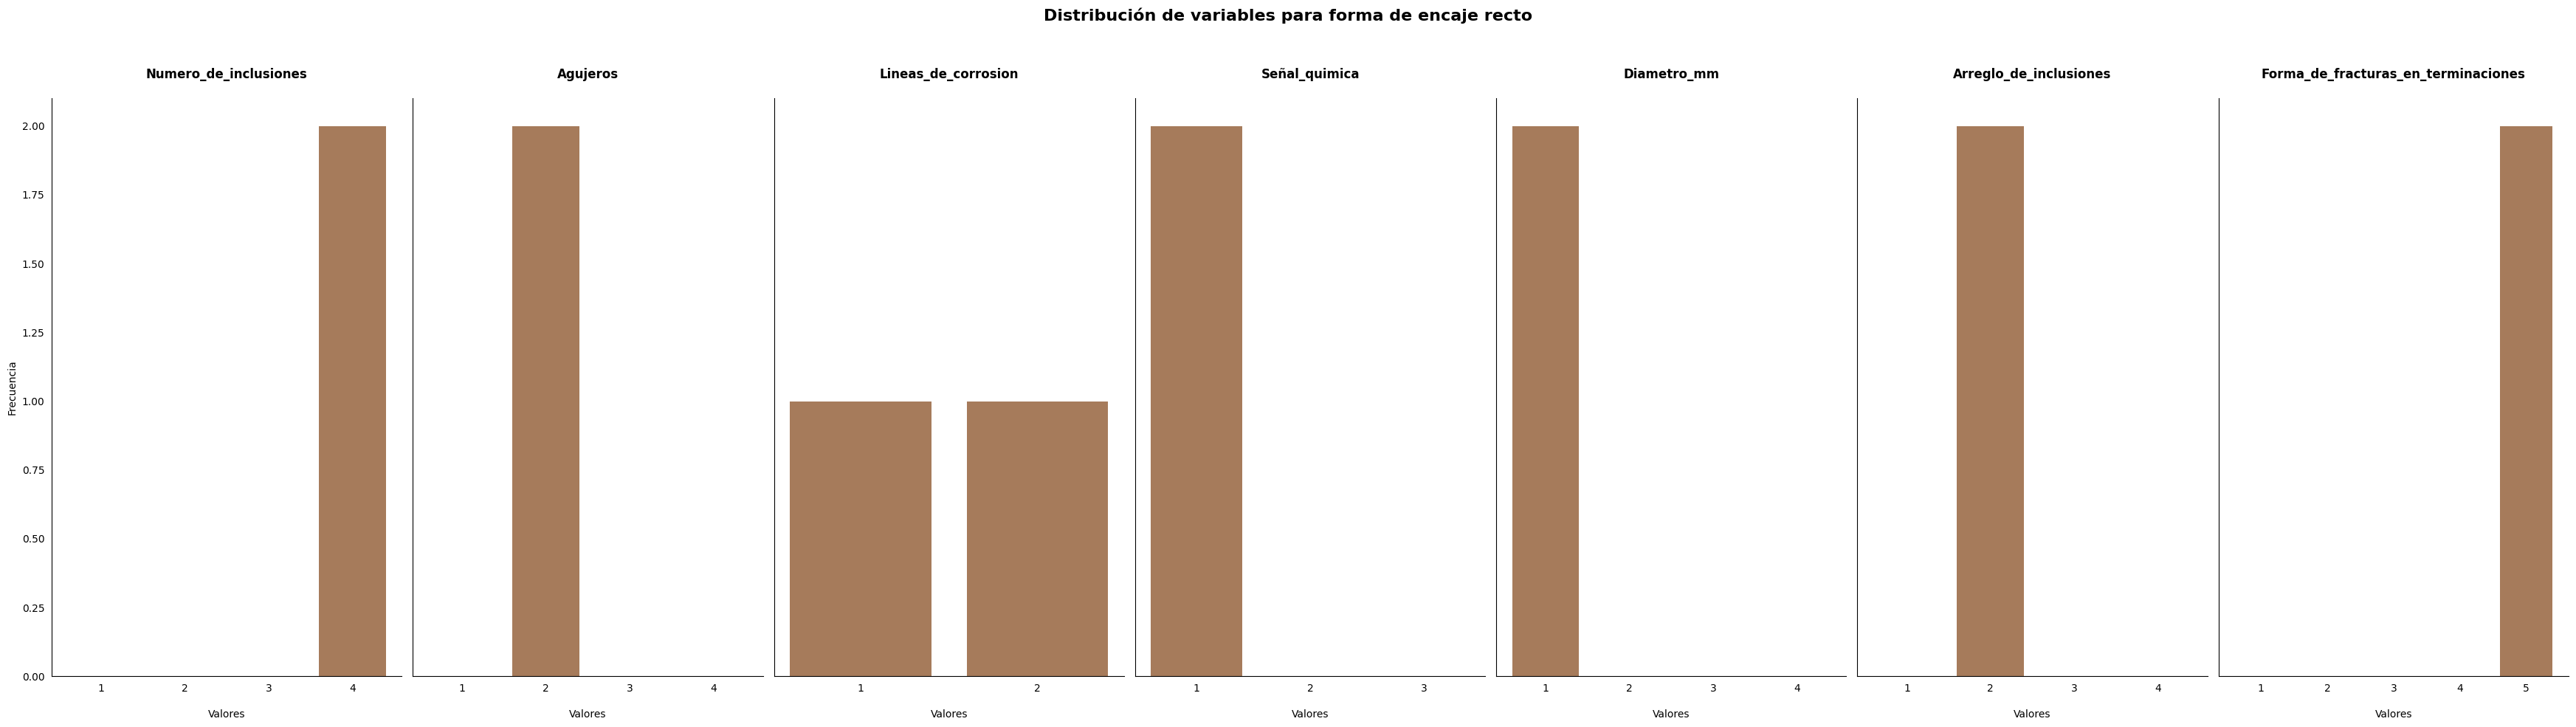

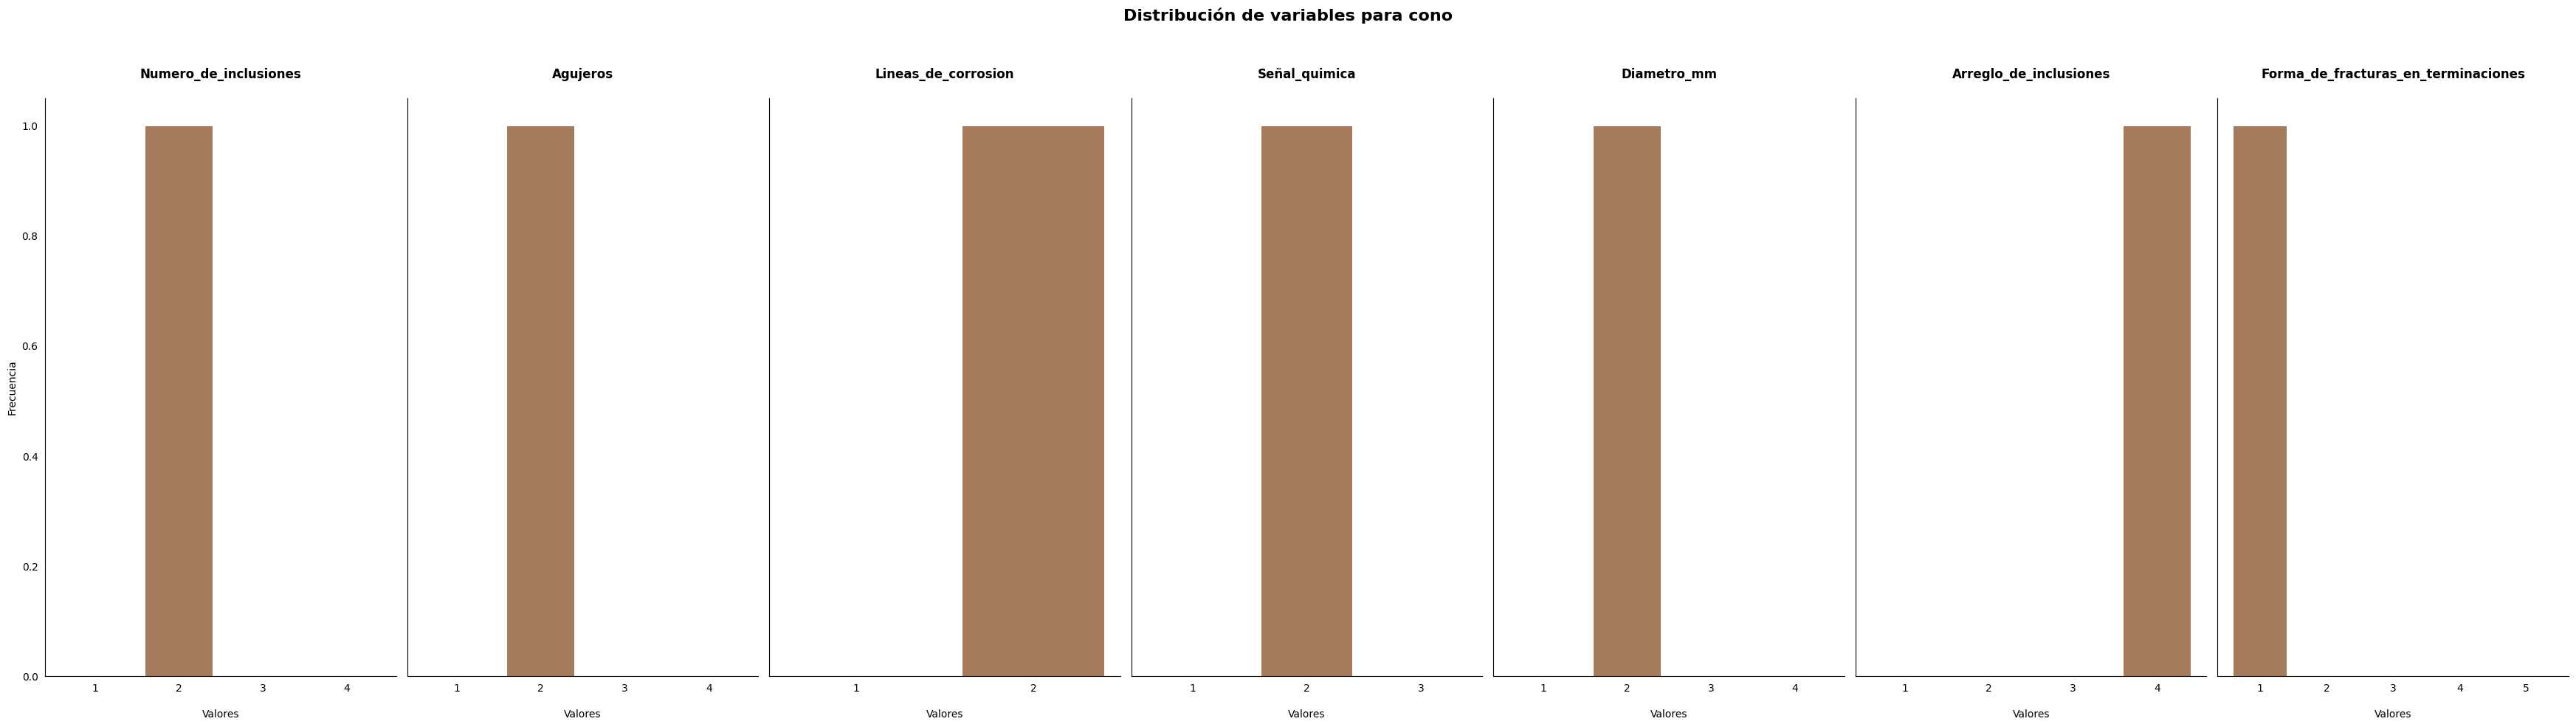

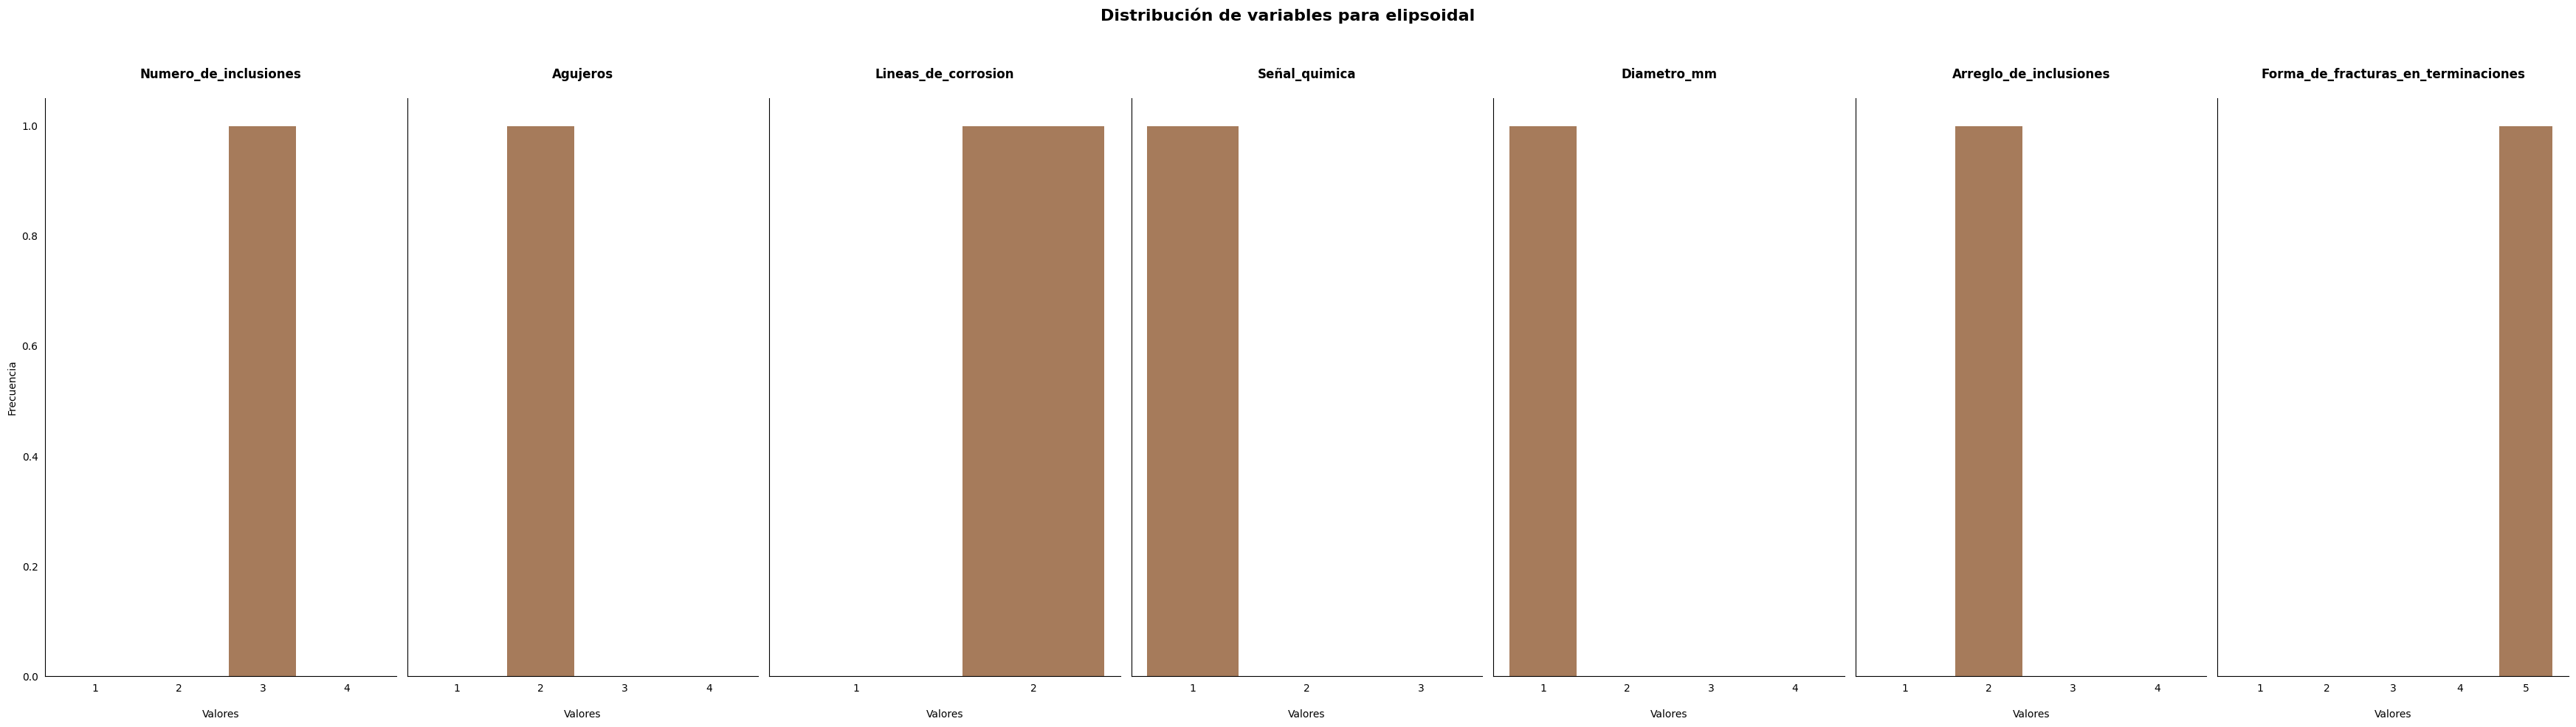

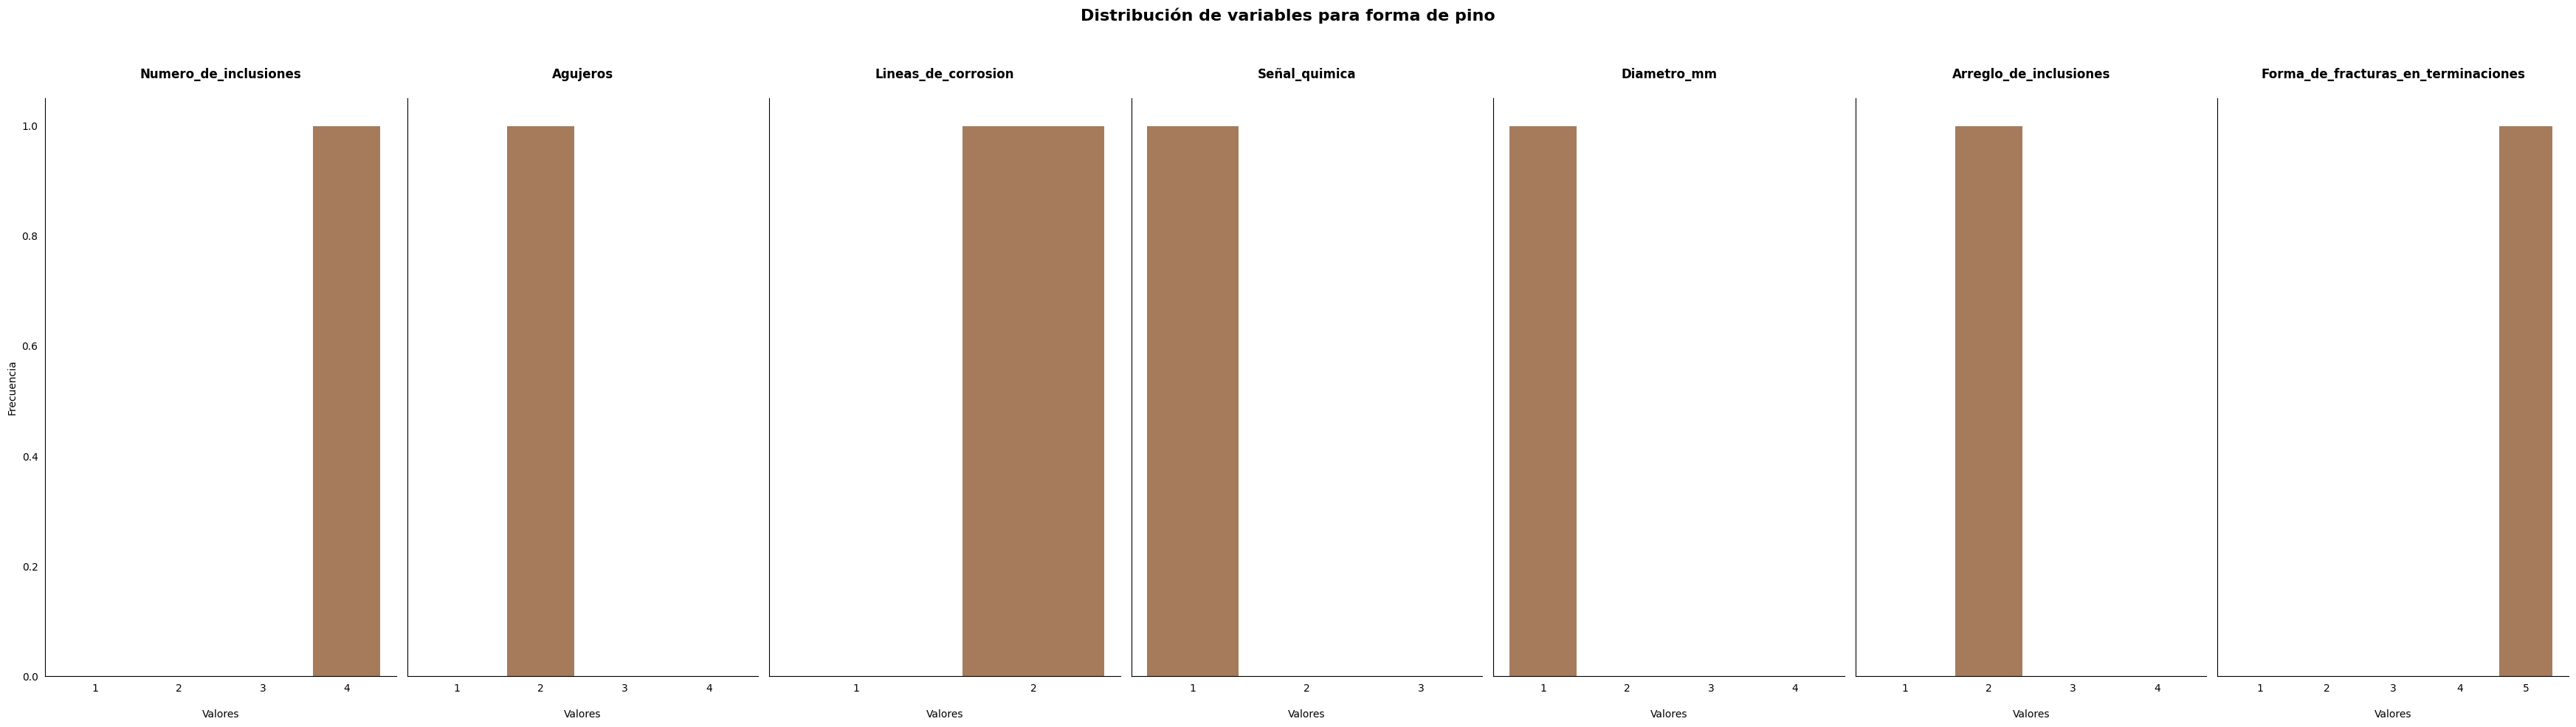

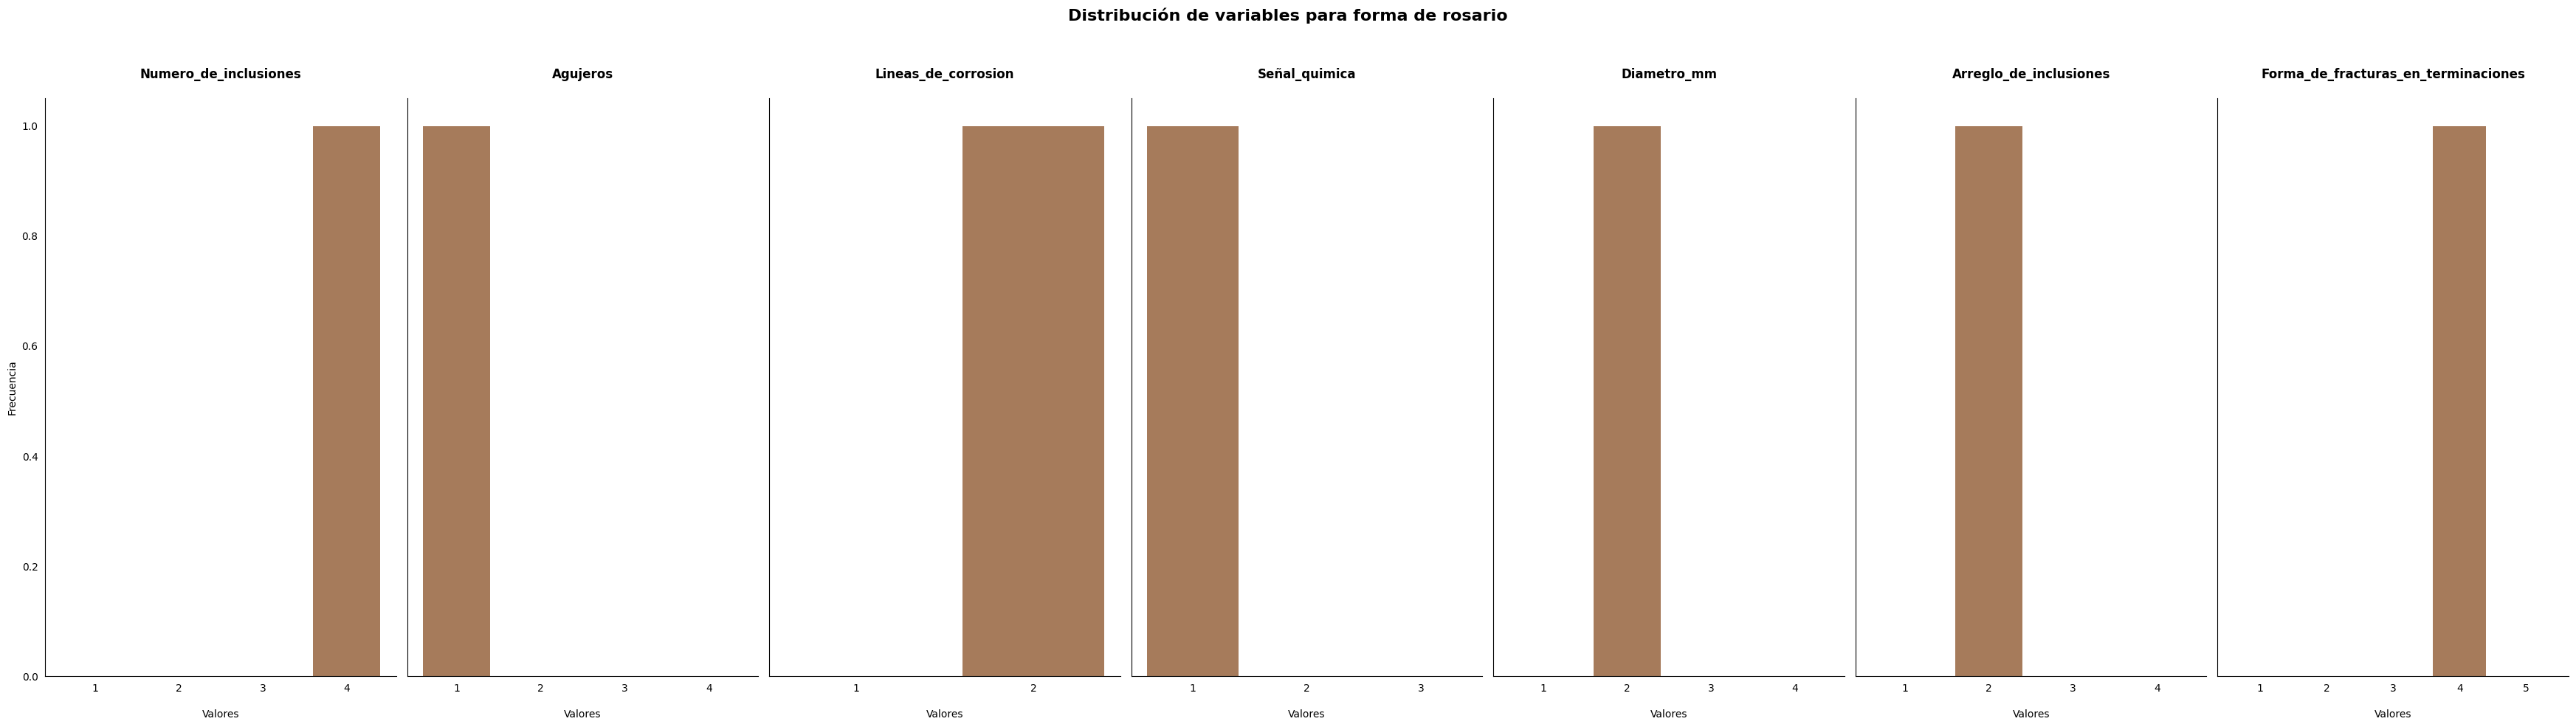

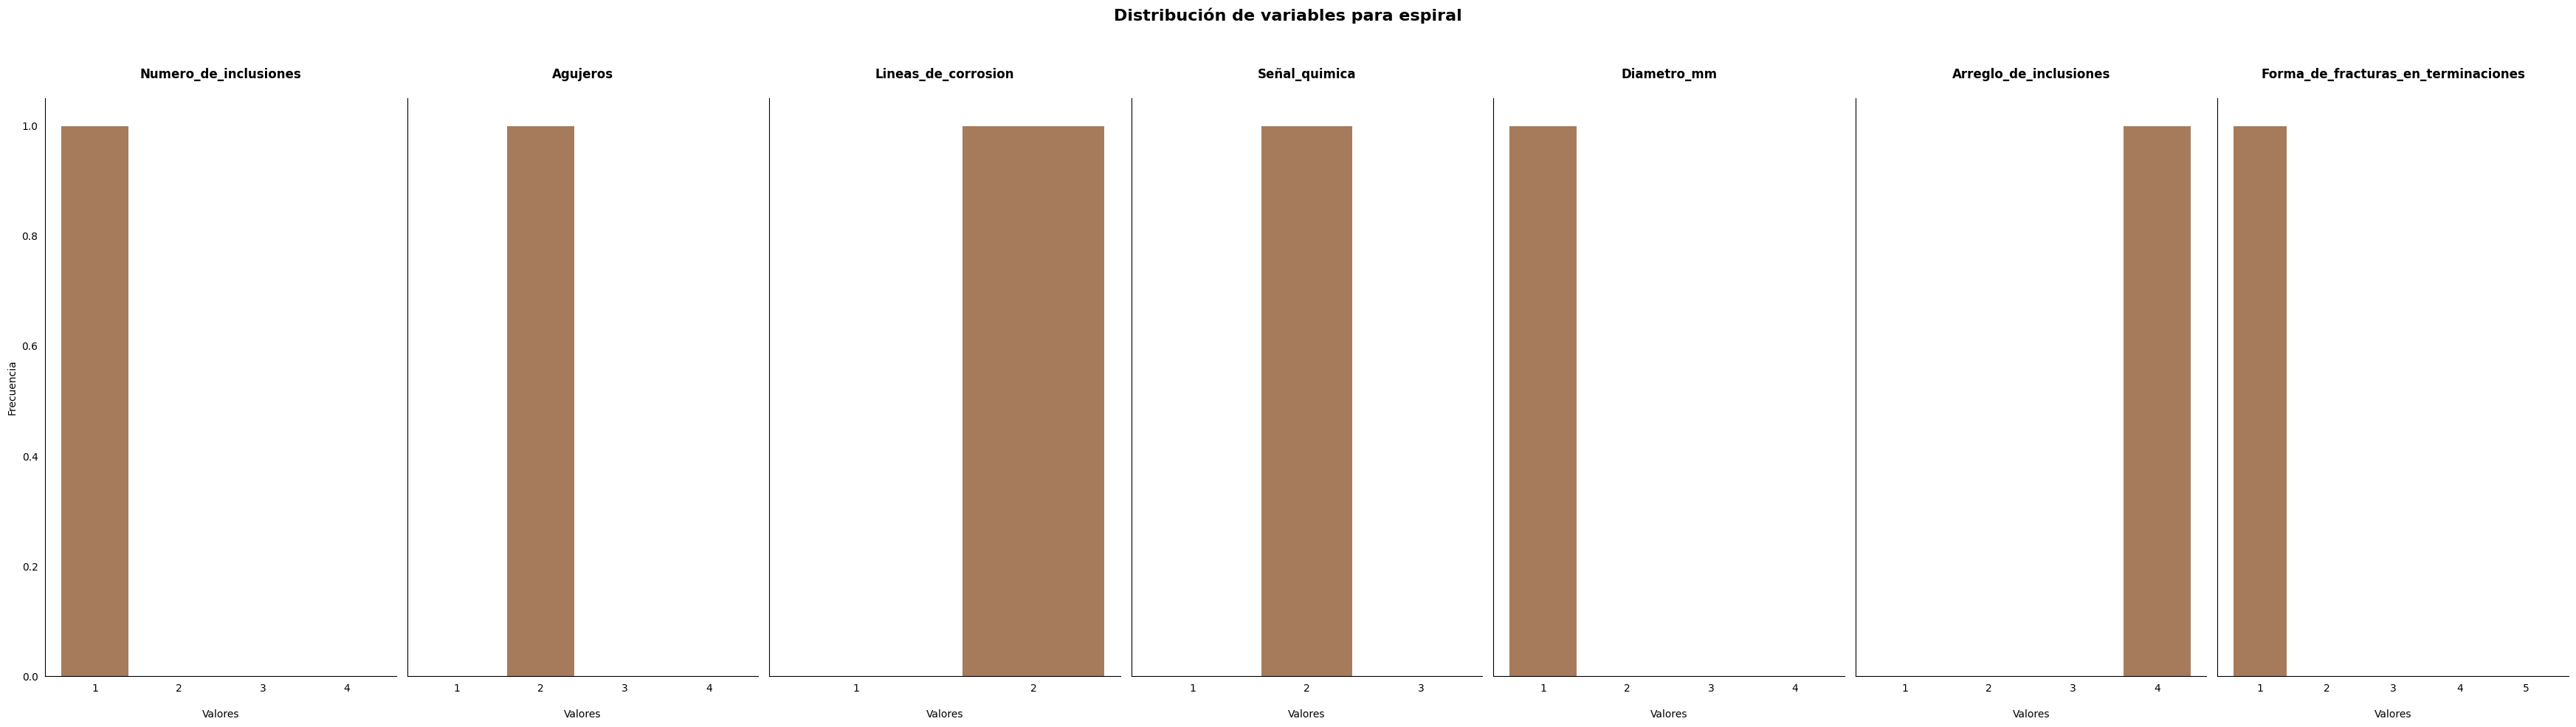

In [12]:
# Create individual figures for each Ejemplar with bar plots showing the count of each value for each variable
variables = ['Numero_de_inclusiones', 'Agujeros', 'Lineas_de_corrosion',
             'Señal_quimica', 'Diametro_mm', 'Arreglo_de_inclusiones',
             'Forma_de_fracturas_en_terminaciones']

ejemplar_order = df['Ejemplar'].value_counts().sort_values(ascending=False).index

for ejemplar in ejemplar_order:
    fig, axes = plt.subplots(1, len(variables), figsize=(len(variables) * 5, 10), sharey=True)
    fig.suptitle(f"Distribución de variables para {ejemplar}", fontsize=16, fontweight='bold')

    for i, variable in enumerate(variables):
        value_counts = df[df['Ejemplar'] == ejemplar][variable].value_counts().sort_index()
        all_values = np.arange(int(df[variable].min()), int(df[variable].max()) + 1)
        counts = [value_counts.get(val, 0) for val in all_values]
        axes[i].bar(all_values.astype(str), counts, color='#A67B5B')
        axes[i].set_title(f"{variable}", pad=20, fontweight='bold')
        axes[i].set_xlabel('Valores', labelpad=15)
        if i == 0:
            axes[i].set_ylabel('Frecuencia')

        # Customize ticks and spines
        axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
        axes[i].tick_params(axis='y', which='both', left=False)
        axes[i].spines['left'].set_visible(True)
        axes[i].spines['bottom'].set_visible(True)
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)

    # Customize the overall layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

**¿Cuál es el valor de mediana de cada variable por Ejemplar?**

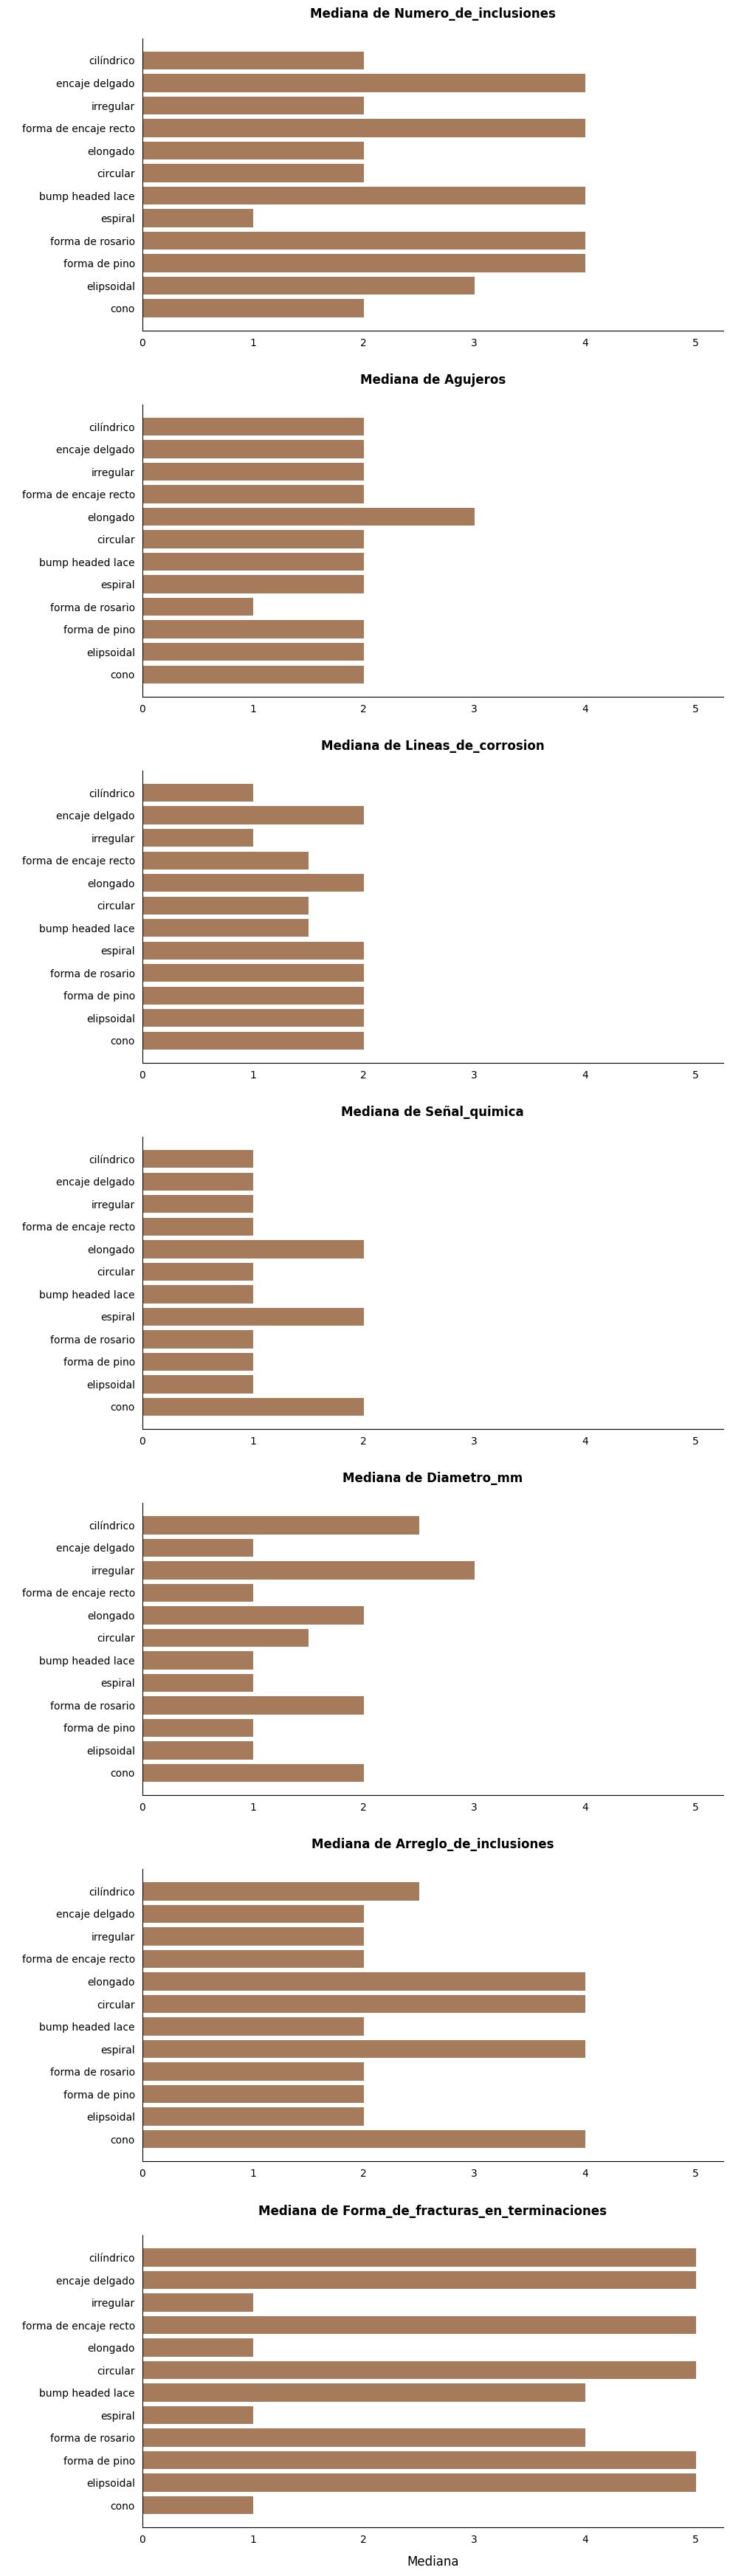

In [13]:
# Sort 'Ejemplar' values in the same order as in the frequency plot
ejemplar_order = df['Ejemplar'].value_counts().sort_values(ascending=True).index

# Group by 'Ejemplar' and calculate the median for each group
grouped_data = df.groupby('Ejemplar').median()

# Reindex the grouped data to match the order of 'ejemplar_order'
grouped_data_sorted = grouped_data.loc[ejemplar_order]

# Create subplots
num_vars = len(grouped_data_sorted.columns)
fig, axes = plt.subplots(num_vars, 1, figsize=(10, num_vars * 5), sharex=True)

# Plot each variable as a horizontal bar chart with sorted values
for i, column in enumerate(grouped_data_sorted.columns):
    bars = axes[i].barh(grouped_data_sorted[column].index, grouped_data_sorted[column], color='#A67B5B')
    axes[i].set_title(f"Mediana de {column}", pad=20, fontweight='bold')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')

    # Customize ticks and spines
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    axes[i].tick_params(axis='y', which='both', left=False)
    axes[i].spines['left'].set_visible(True)
    axes[i].spines['bottom'].set_visible(True)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

axes[-1].set_xlabel('Mediana', labelpad=10, fontsize=12)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import pairwise_distances

In [25]:
pd.DataFrame(pairwise_distances(df.drop('Ejemplar',axis=1), metric='braycurtis'))

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000000,0.096774,0.161290,0.142857,0.200000,0.166667,0.200000,0.058824,0.354839,0.062500,...,0.407407,0.393939,0.000000,0.125000,0.379310,0.030303,0.000000,0.000000,0.030303,0.062500
1,0.096774,0.000000,0.266667,0.176471,0.310345,0.200000,0.310345,0.151515,0.266667,0.096774,...,0.384615,0.312500,0.096774,0.096774,0.285714,0.062500,0.096774,0.096774,0.062500,0.096774
2,0.161290,0.266667,0.000000,0.117647,0.172414,0.142857,0.172414,0.090909,0.266667,0.161290,...,0.384615,0.437500,0.161290,0.290323,0.214286,0.187500,0.161290,0.161290,0.187500,0.225806
3,0.142857,0.176471,0.117647,0.000000,0.212121,0.025641,0.212121,0.081081,0.176471,0.085714,...,0.400000,0.333333,0.142857,0.142857,0.250000,0.111111,0.142857,0.142857,0.111111,0.142857
4,0.200000,0.310345,0.172414,0.212121,0.000000,0.235294,0.000000,0.250000,0.379310,0.200000,...,0.200000,0.354839,0.200000,0.266667,0.407407,0.225806,0.200000,0.200000,0.225806,0.266667
5,0.166667,0.200000,0.142857,0.025641,0.235294,0.000000,0.235294,0.105263,0.142857,0.111111,...,0.419355,0.297297,0.166667,0.166667,0.212121,0.135135,0.166667,0.166667,0.135135,0.166667
6,0.200000,0.310345,0.172414,0.212121,0.000000,0.235294,0.000000,0.250000,0.379310,0.200000,...,0.200000,0.354839,0.200000,0.266667,0.407407,0.225806,0.200000,0.200000,0.225806,0.266667
7,0.058824,0.151515,0.090909,0.081081,0.250000,0.105263,0.250000,0.000000,0.272727,0.117647,...,0.448276,0.428571,0.058824,0.176471,0.290323,0.085714,0.058824,0.058824,0.085714,0.117647
8,0.354839,0.266667,0.266667,0.176471,0.379310,0.142857,0.379310,0.272727,0.000000,0.290323,...,0.307692,0.187500,0.354839,0.290323,0.071429,0.312500,0.354839,0.354839,0.312500,0.354839
9,0.062500,0.096774,0.161290,0.085714,0.200000,0.111111,0.200000,0.117647,0.290323,0.000000,...,0.407407,0.333333,0.062500,0.125000,0.310345,0.030303,0.062500,0.062500,0.030303,0.062500
